In [1]:
# import important liberaries

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [3]:
df_fhs=pd.read_csv(r"heart dataset.csv.csv")

In [4]:
df_fhs

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0  

[4240 rows x 16 columns]

In [5]:
df_fhs.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [6]:
df_fhs.shape

(4240, 16)

In [7]:
df_fhs.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

In [8]:
df_fhs.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [9]:
df_fhs.describe().transpose()

count        mean        std     min     25%    50%     75%  \
male             4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
male               1.0  
age               70.0  
education          4.0  
currentSmoker      1.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
diabetes           1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

# Filtering data  and cleaning

In [10]:
df_fhs.isnull().sum()/len(df_fhs)*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

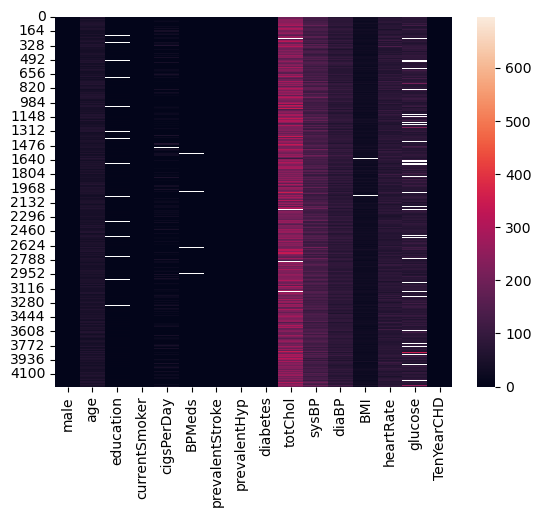

In [11]:
sns.heatmap(df_fhs)
plt.show

In [12]:
df_fhs.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:

df_fhs.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
df_fhs.nunique(axis=0,dropna=False)

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1365
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [15]:
df_fhs.nunique(axis=1,dropna=False)

0       10
1        9
2       10
3       11
4       10
        ..
4235    12
4236    10
4237     9
4238    10
4239    11
Length: 4240, dtype: int64

In [16]:
df_fhs['BMI']=df_fhs['BMI'].fillna(df_fhs['BMI'].mean())
df_fhs['glucose']=df_fhs['glucose'].fillna(df_fhs['glucose'].mean())

In [17]:
df_fhs['glucose']

0        77.000000
1        76.000000
2        70.000000
3       103.000000
4        85.000000
           ...    
4235     86.000000
4236     81.963655
4237    107.000000
4238     72.000000
4239     80.000000
Name: glucose, Length: 4240, dtype: float64

In [18]:
df_fhs.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

<Axes: >

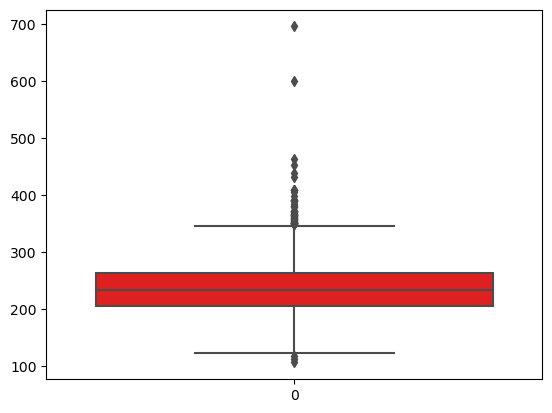

In [19]:
sns.boxplot(df_fhs["totChol"],color = "red")

<Axes: xlabel='totChol', ylabel='Count'>

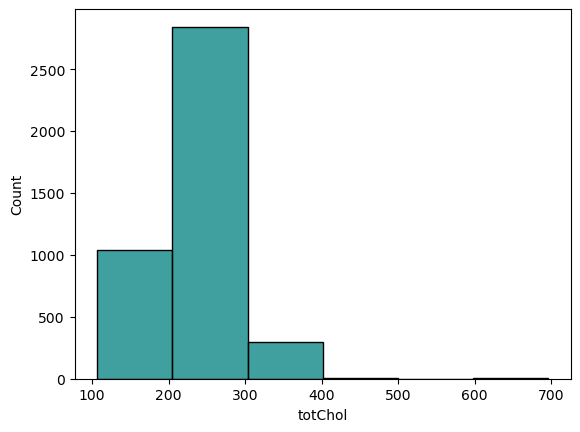

In [20]:
sns.histplot(df_fhs["totChol"],color="teal",bins=6)

In [21]:
df_fhs = df_fhs.drop('education', axis=1)

In [22]:
df_fhs

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4235             0         0    248.0  131.0   72.0  22.00       84.0   
4236             0         0    210.0  126.5   87.0  19.16       86.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   
4238             1         0    185.0  141.0   98.0  25.60       67.0   
4239             0         0    196.0  133.0   86.0  20.91       85.0   

         glucose  TenYearCHD  
0      77.000000           0  
1      76.000000           0  
2      70.000000           0  
3     103.000000           1  
4      85.000000           0  
...          ...         ...  
4235   86.000000           0  
4236   81.963655           0  
4237  107.000000           0  
4238   72.000000           0  
4239   80.000000           0  

[4240 rows x 15 columns]

In [23]:
df_fhs['cigsPerDay']=df_fhs['cigsPerDay'].fillna(df_fhs['cigsPerDay'].mean())


In [24]:
df_fhs['cigsPerDay'].isnull().sum()

0

<Axes: >

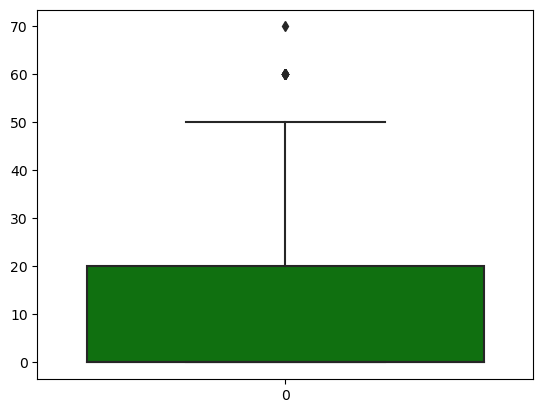

In [25]:
sns.boxplot(df_fhs['cigsPerDay'],color='green')

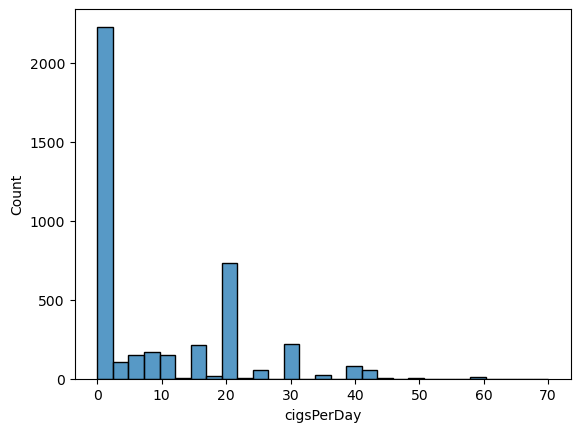

In [26]:
sns.histplot(df_fhs['cigsPerDay'])
plt.show()

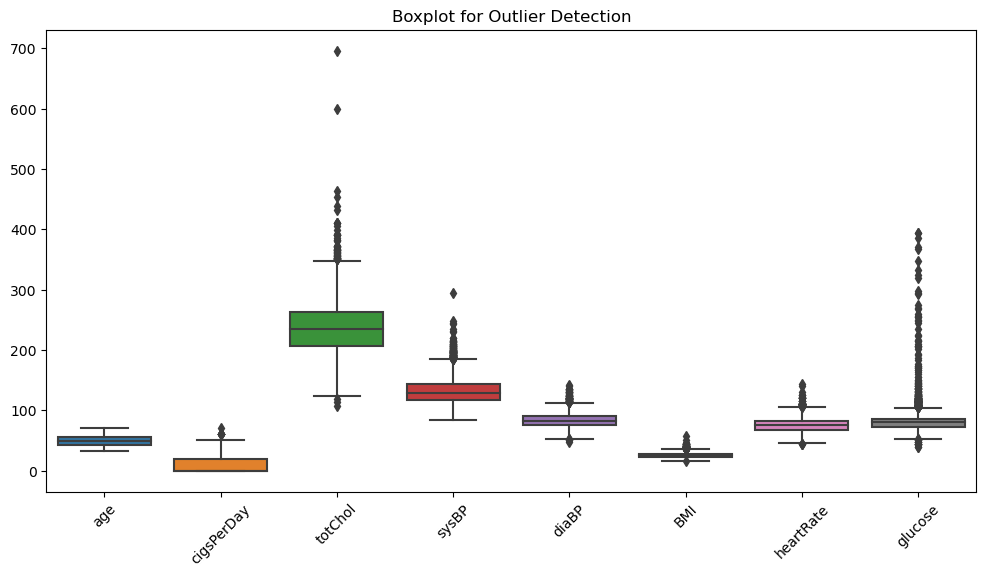

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fhs[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [28]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df_cleaned = remove_outliers(df_fhs, columns_to_clean)

df_cleaned.shape

(3584, 15)

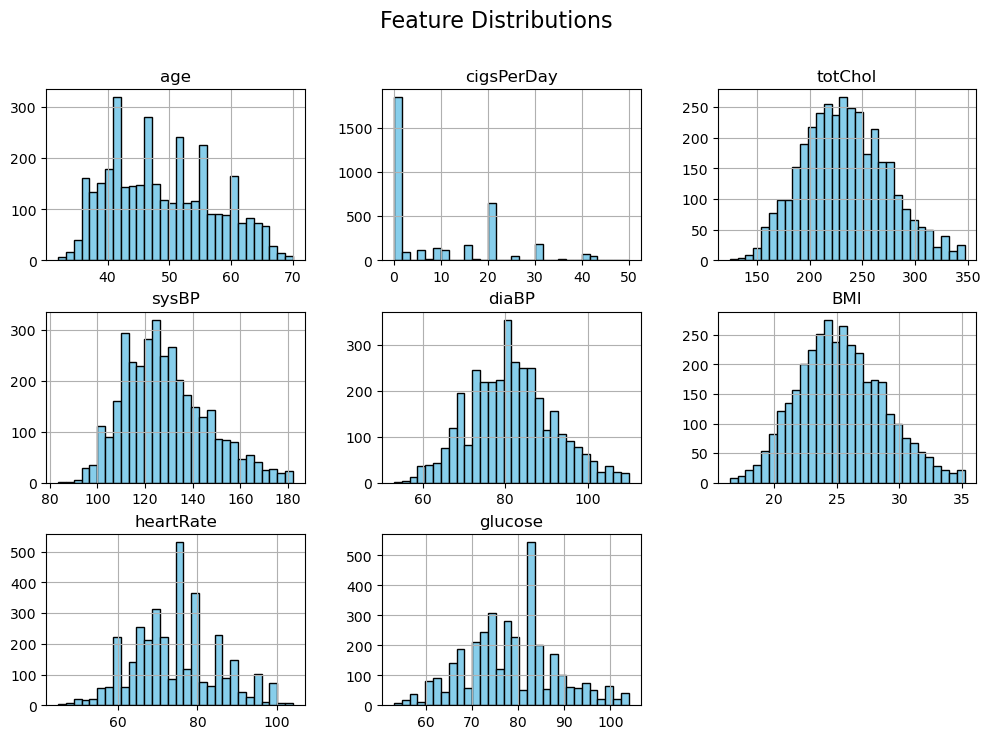

In [29]:
columns_to_plot = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

df_cleaned[columns_to_plot].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

C:\Users\RAMKISHAN AHIRWAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


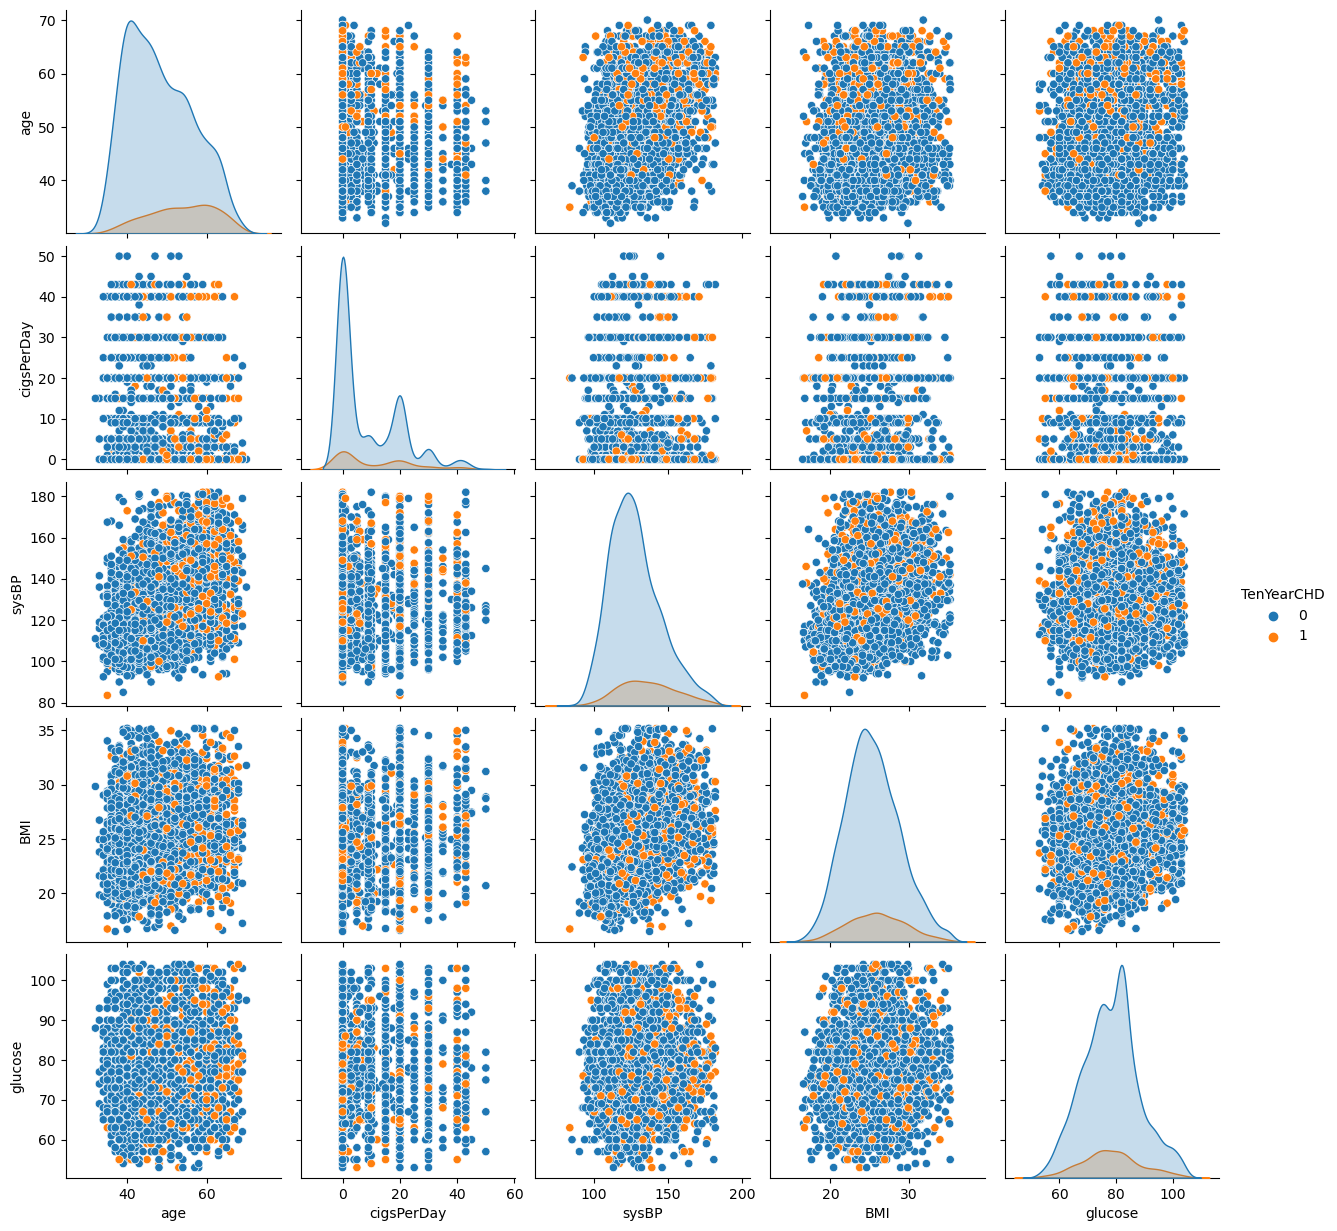

In [30]:

imp_feat = ['age', 'cigsPerDay', 'sysBP', 'BMI', 'glucose', 'TenYearCHD']

# Plot pairplot
sns.pairplot(df_cleaned[imp_feat], hue="TenYearCHD", diag_kind="kde")
plt.show()

In [31]:
df_fhs=df_fhs.dropna()

In [32]:

df_fhs.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [33]:
df_fhs.duplicated().sum()

0

# data transformation

In [34]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   int64  
 1   age              4137 non-null   int64  
 2   currentSmoker    4137 non-null   int64  
 3   cigsPerDay       4137 non-null   float64
 4   BPMeds           4137 non-null   float64
 5   prevalentStroke  4137 non-null   int64  
 6   prevalentHyp     4137 non-null   int64  
 7   diabetes         4137 non-null   int64  
 8   totChol          4137 non-null   float64
 9   sysBP            4137 non-null   float64
 10  diaBP            4137 non-null   float64
 11  BMI              4137 non-null   float64
 12  heartRate        4137 non-null   float64
 13  glucose          4137 non-null   float64
 14  TenYearCHD       4137 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 517.1 KB


In [35]:
df_fhs['diabetes'].unique()

array([0, 1], dtype=int64)

In [36]:
df_fhs['diabetes'].value_counts(normalize=True)

diabetes
0    0.974378
1    0.025622
Name: proportion, dtype: float64

In [37]:
df_fhs['diabetes']=df_fhs['diabetes'].replace(['non-diabetes','diabetes'],(1,2))

C:\Users\RAMKISHAN AHIRWAR\AppData\Local\Temp\ipykernel_5912\1639344800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fhs['diabetes']=df_fhs['diabetes'].replace(['non-diabetes','diabetes'],(1,2))


In [38]:
df_fhs['diabetes'].unique()

array([0, 1], dtype=int64)

In [39]:
df_fhs['diabetes'].value_counts(normalize=True)

diabetes
0    0.974378
1    0.025622
Name: proportion, dtype: float64

In [40]:
pd.get_dummies(df_fhs['diabetes'])

0      1
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
...    ...    ...
4234  True  False
4236  True  False
4237  True  False
4238  True  False
4239  True  False

[4137 rows x 2 columns]

In [41]:
df_fhs['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)

In [42]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   int64  
 1   age              4137 non-null   int64  
 2   currentSmoker    4137 non-null   int64  
 3   cigsPerDay       4137 non-null   float64
 4   BPMeds           4137 non-null   float64
 5   prevalentStroke  4137 non-null   int64  
 6   prevalentHyp     4137 non-null   int64  
 7   diabetes         4137 non-null   int64  
 8   totChol          4137 non-null   float64
 9   sysBP            4137 non-null   float64
 10  diaBP            4137 non-null   float64
 11  BMI              4137 non-null   float64
 12  heartRate        4137 non-null   float64
 13  glucose          4137 non-null   float64
 14  TenYearCHD       4137 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 517.1 KB


In [43]:
# df_fhs["age"] =df_fhs["age"].replace(["young_adult","adults","middle_aged","old","youth"],["26-40","41-55","56-70",">70","<25"])

<Axes: xlabel='age'>

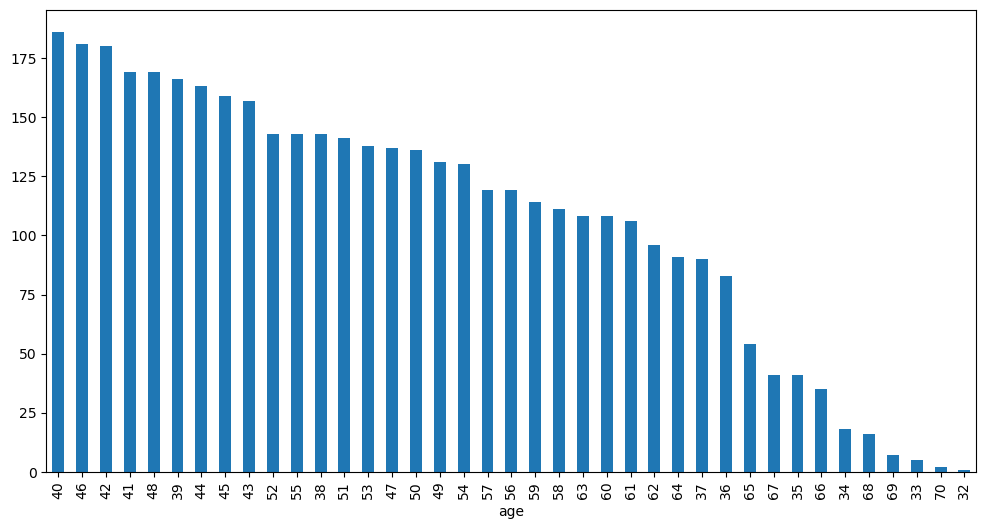

In [44]:
plt.figure(figsize=(12,6))

df_fhs["age"].value_counts().plot(kind='bar')

In [45]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   int64  
 1   age              4137 non-null   int64  
 2   currentSmoker    4137 non-null   int64  
 3   cigsPerDay       4137 non-null   float64
 4   BPMeds           4137 non-null   float64
 5   prevalentStroke  4137 non-null   int64  
 6   prevalentHyp     4137 non-null   int64  
 7   diabetes         4137 non-null   int64  
 8   totChol          4137 non-null   float64
 9   sysBP            4137 non-null   float64
 10  diaBP            4137 non-null   float64
 11  BMI              4137 non-null   float64
 12  heartRate        4137 non-null   float64
 13  glucose          4137 non-null   float64
 14  TenYearCHD       4137 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 517.1 KB


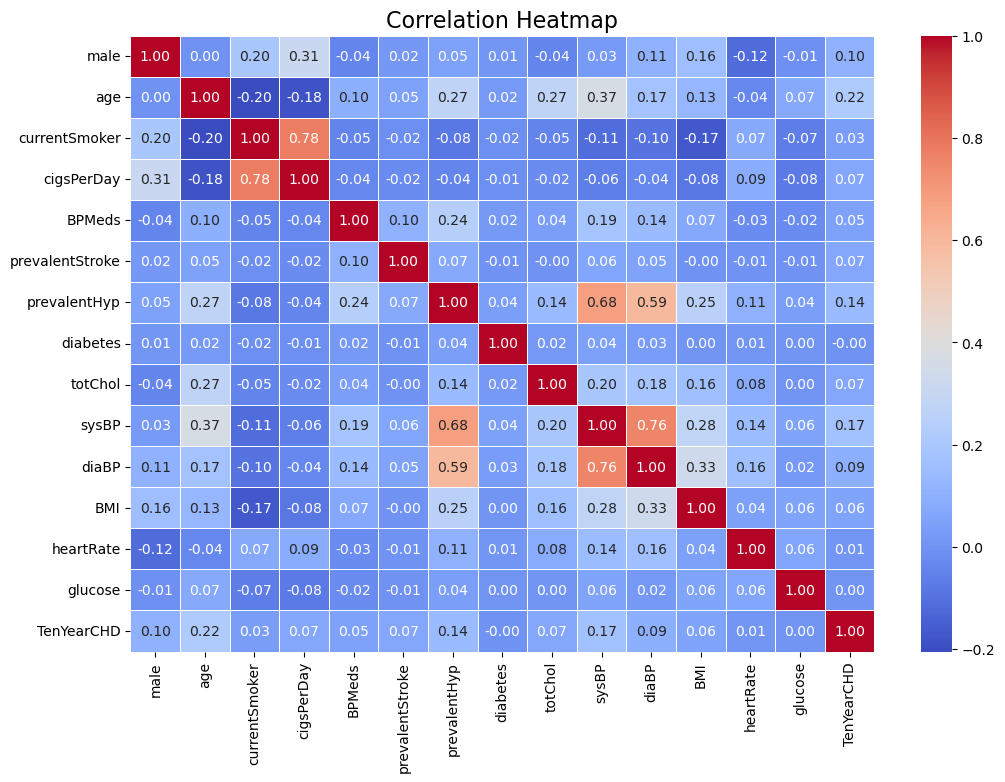

In [46]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

C:\Users\RAMKISHAN AHIRWAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

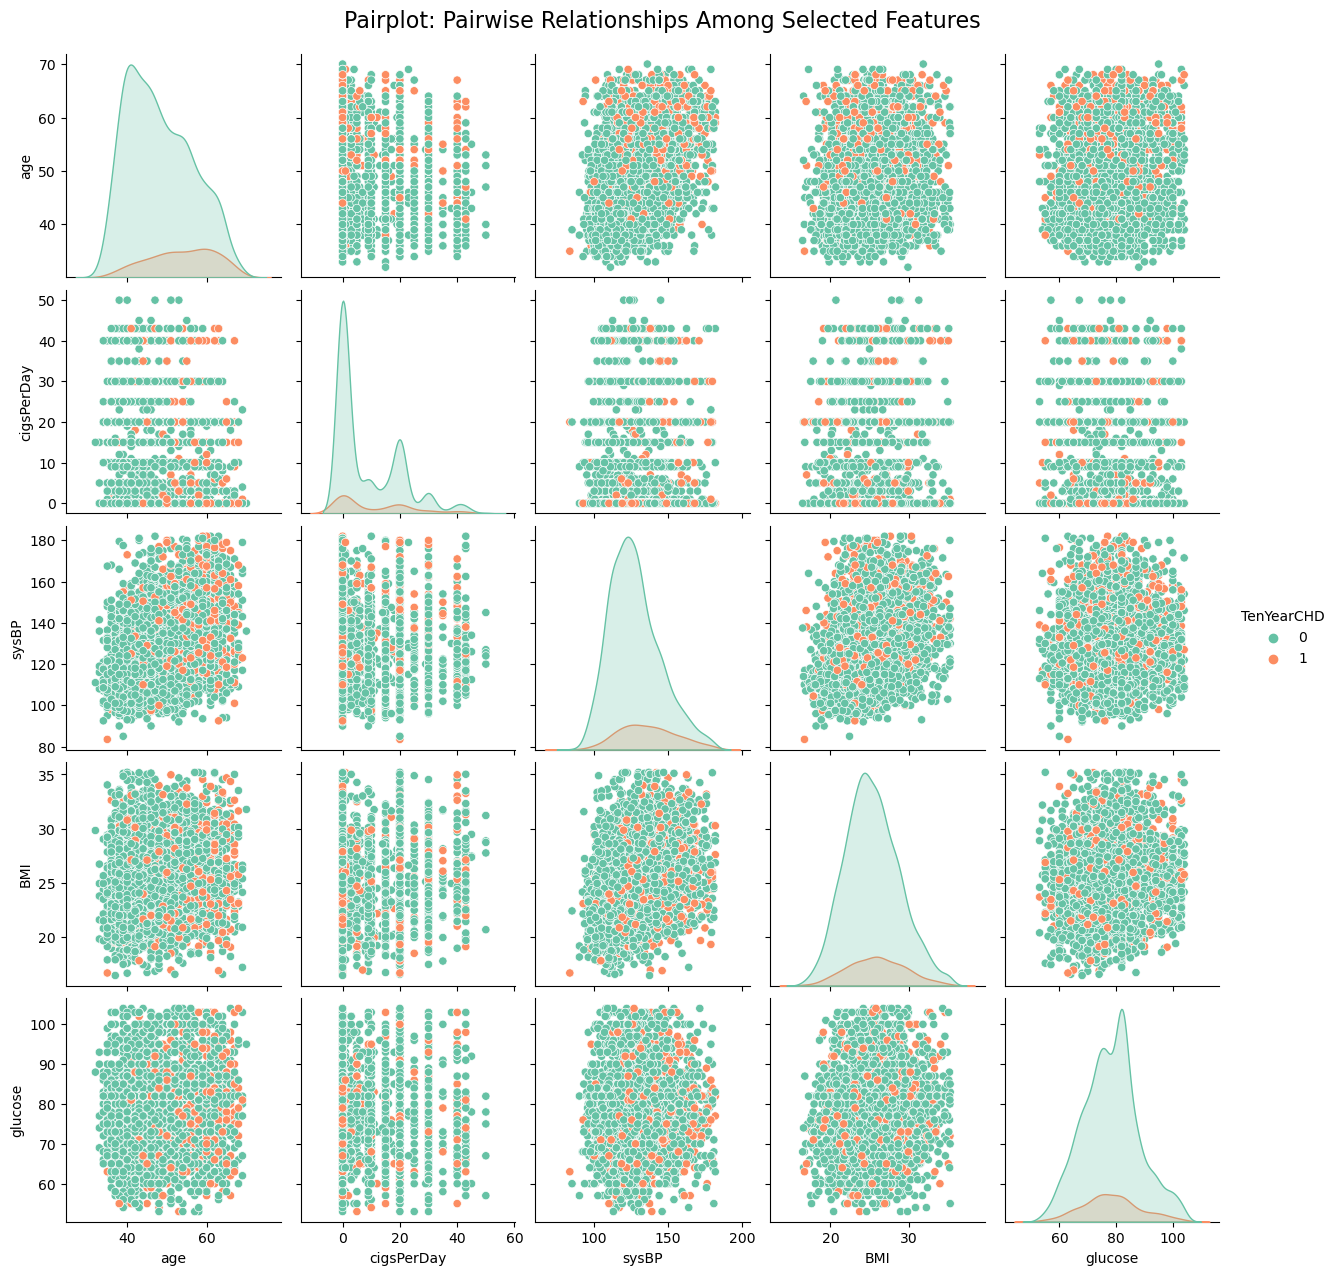

In [47]:

#Pairplot: Pairwise Relationships (using target variable for hue)
plt.figure(figsize=(12, 8))

pairplot_columns = ['age', 'cigsPerDay', 'sysBP', 'BMI', 'glucose', 'TenYearCHD']
sns.pairplot(df_cleaned[pairplot_columns], hue="TenYearCHD", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot: Pairwise Relationships Among Selected Features", y=1.02, fontsize=16)
plt.show()

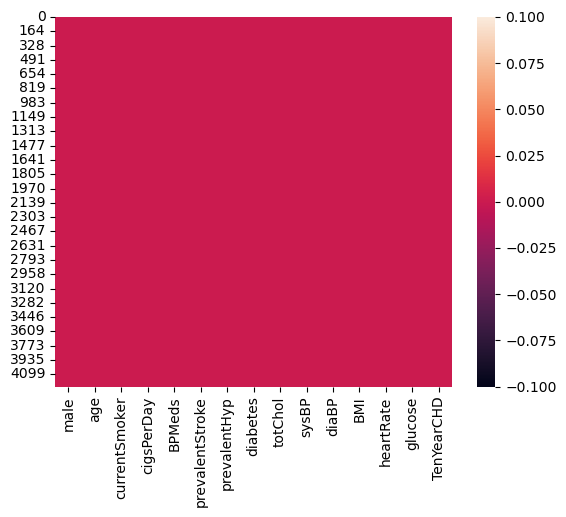

In [48]:
sns.heatmap(df_fhs.isnull())
plt.show()

#

# Explotary Data Analysis

#

**Univariate Analysis Plots using AI**

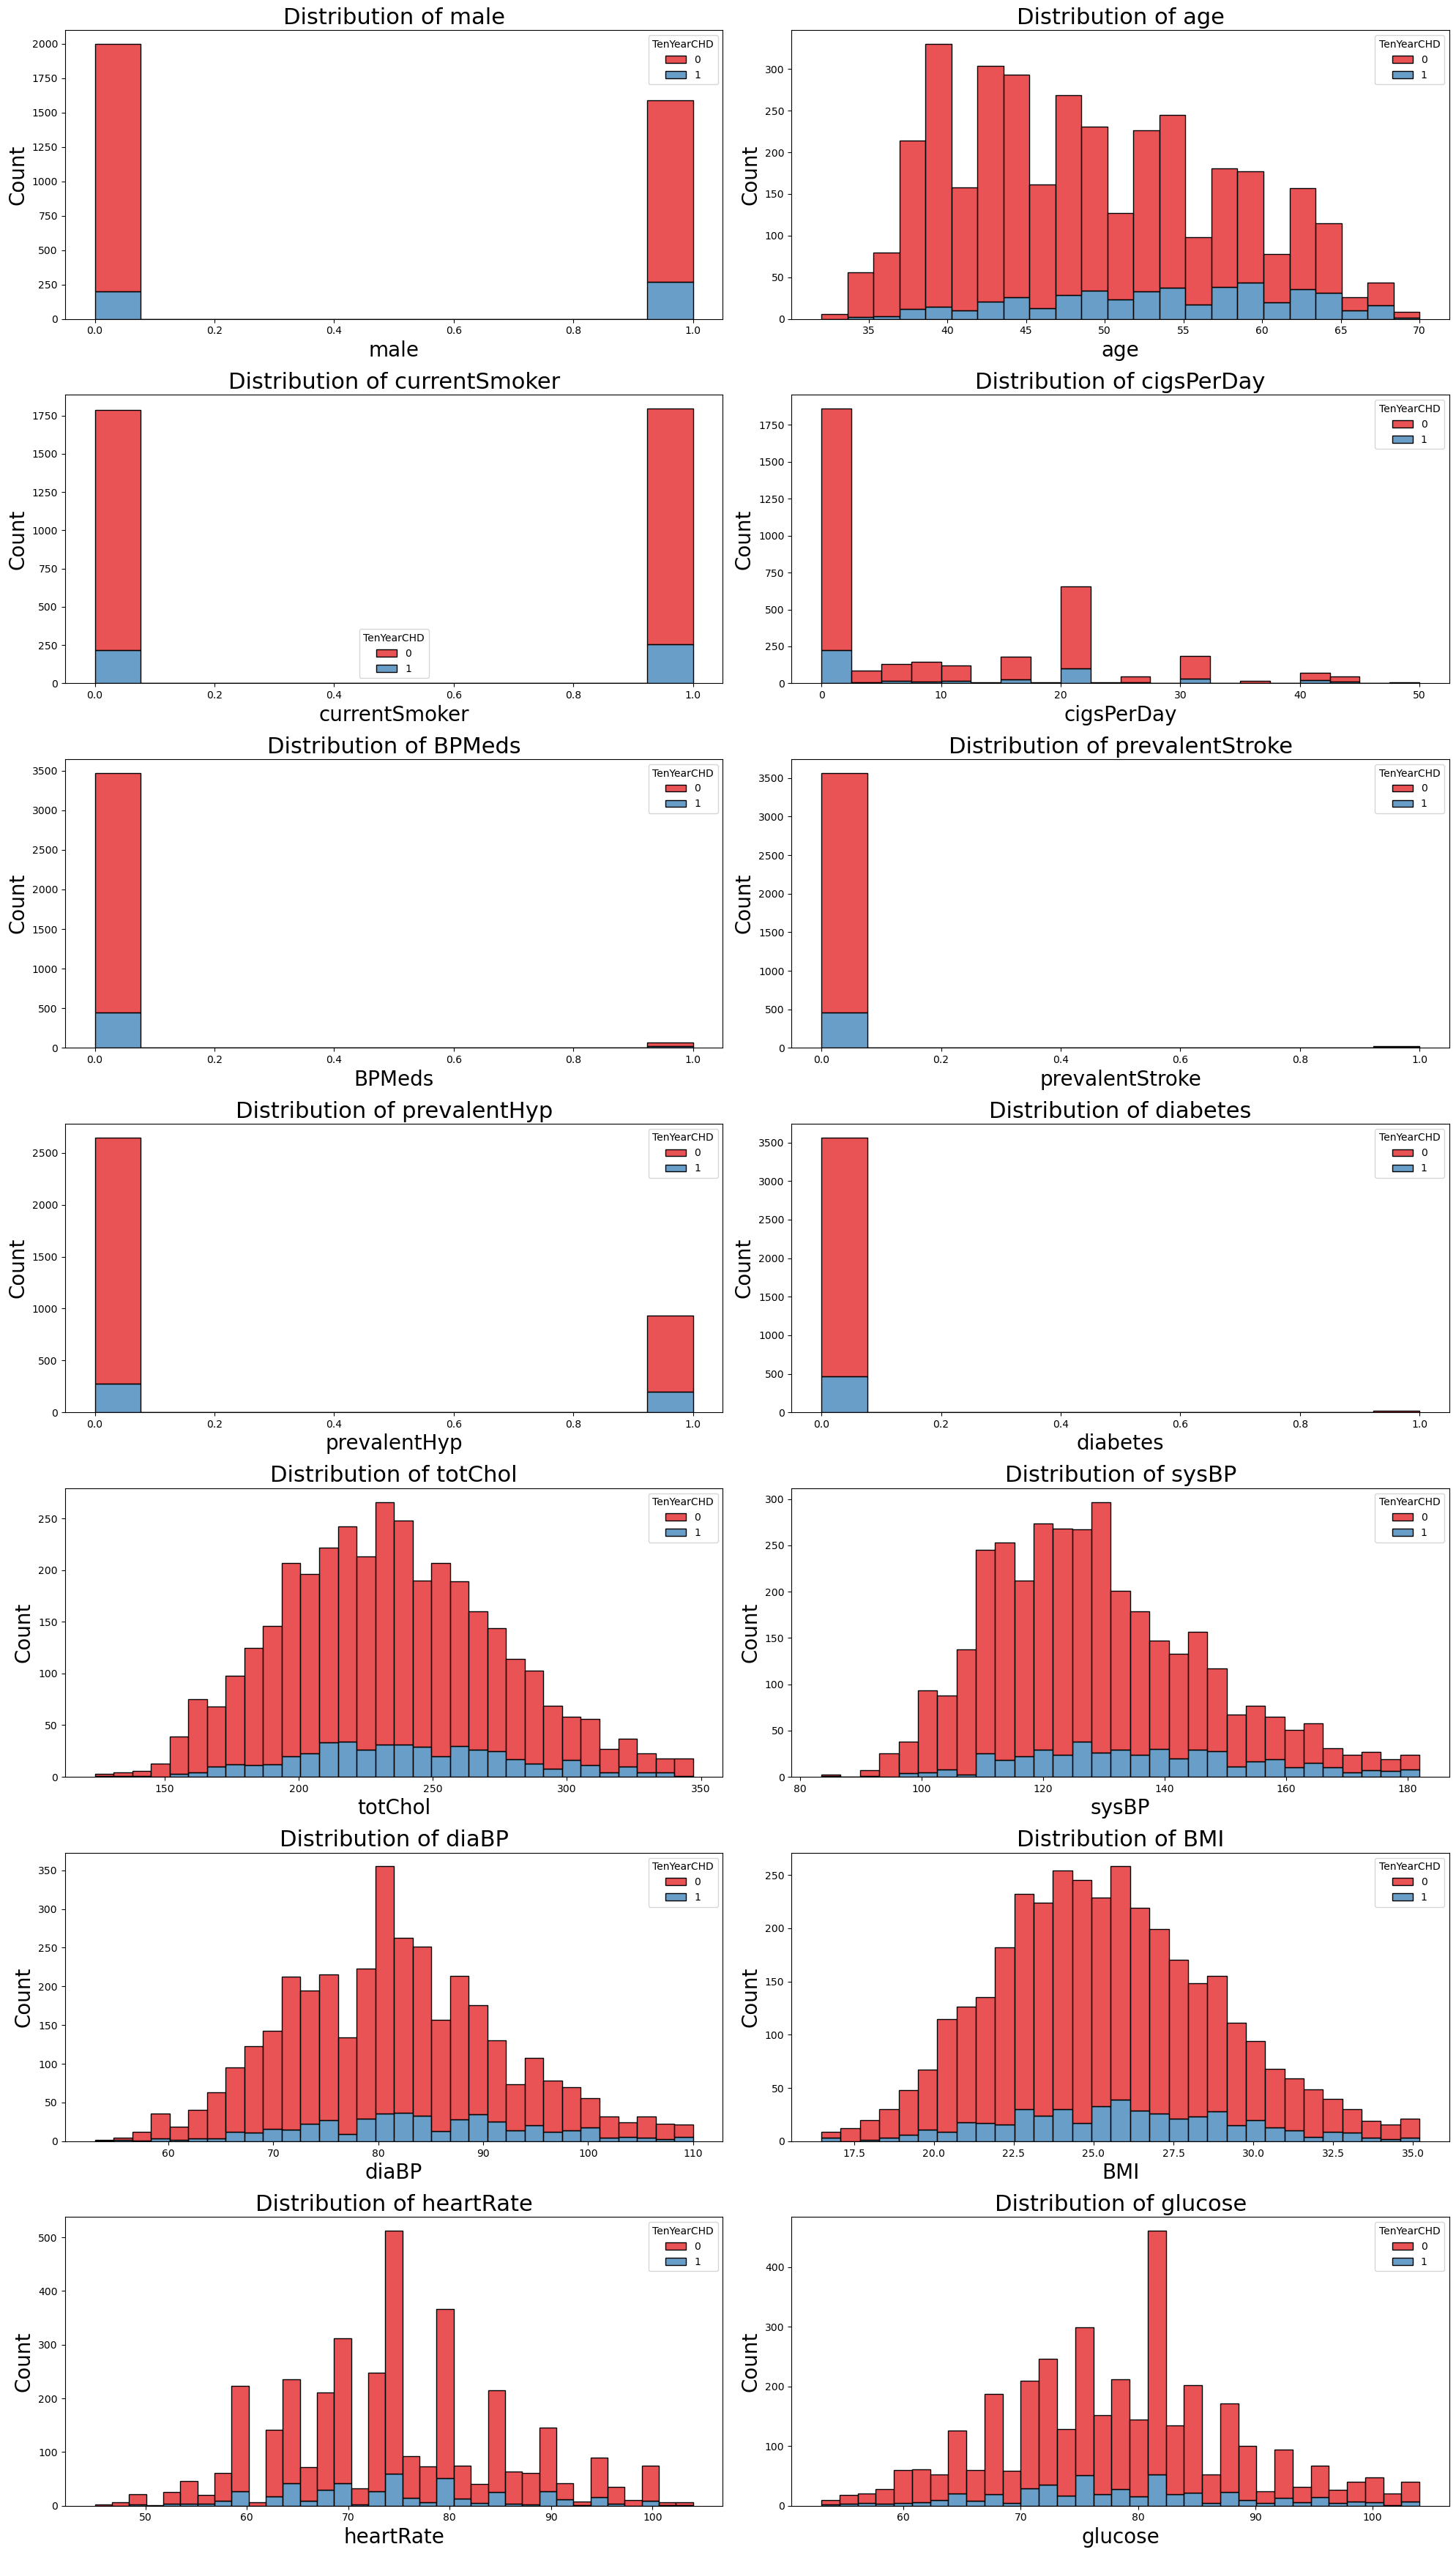

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Exclude the target column from the feature list
features = [col for col in df_cleaned.columns if col != 'TenYearCHD']

# Determine the number of rows needed for 2 plots per row
n_features = len(features)
n_rows = math.ceil(n_features / 2)

# Set up the figure size; adjust as necessary
plt.figure(figsize=(20, 5 * n_rows), facecolor='white')

# Loop through each feature and create a subplot for it
for idx, column in enumerate(features):
    ax = plt.subplot(n_rows, 2, idx + 1)

    # Plot the histogram with a vibrant color palette ("Set1") and additional color options
    sns.histplot(
        data=df_cleaned,
        x=column,
        hue='TenYearCHD',
        palette="Set1",   # Using the "Set1" palette for brighter colors
        multiple="stack", # You can try "dodge" or "stack" as per your preference
        edgecolor='black'
    )

    # Set the x-axis label with a large font size
    plt.xlabel(column, fontsize=20)
    # Set the y-axis label
    plt.ylabel("Count", fontsize=20)
    # Optionally, add a title for each subplot
    plt.title(f"Distribution of {column}", fontsize=22)
plt.tight_layout()
plt.show()


<h3>framingham dataset analysis</h3>

In [50]:
df_farmingham=pd.read_csv(r"heart dataset.csv.csv")

In [51]:
df_farmingham.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [52]:
df_farmingham.tail()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0

In [53]:
df_farmingham.shape

(4240, 16)

In [54]:
df_farmingham.size

67840

In [55]:
df_farmingham.index

RangeIndex(start=0, stop=4240, step=1)

In [56]:
df_farmingham.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [57]:
df_farmingham.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')>

In [58]:
df_farmingham.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [59]:
df_farmingham.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [60]:
df_farmingham.describe().columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [61]:
df_farmingham[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']].count().isnull()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [62]:
df_farmingham.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

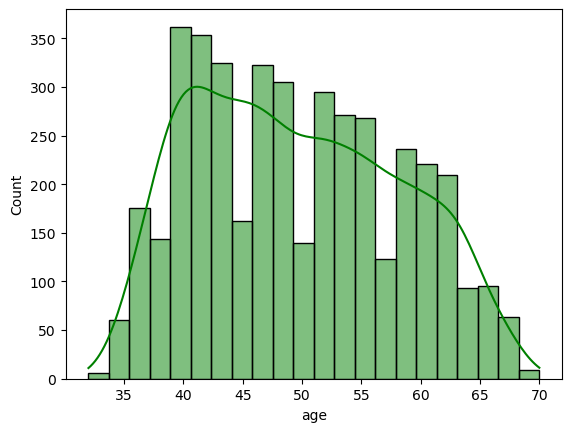

In [63]:
sns.histplot(df_farmingham['age'],kde=True,color="green")
plt.show()

<Axes: >

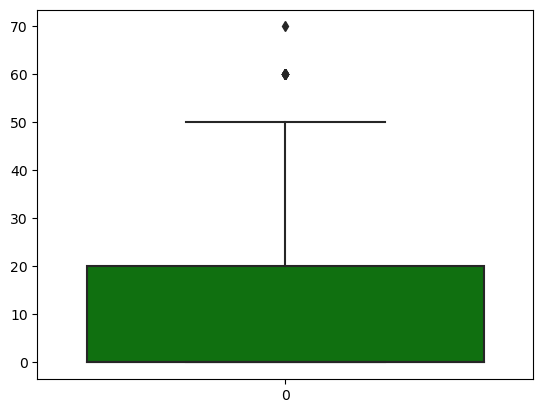

In [64]:
sns.boxplot(df_farmingham["cigsPerDay"],color="green")

In [65]:
numerical_columns=['male', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','heartRate', 'glucose', 'TenYearCHD']

In [66]:
def uni_numerical_analysis(dataframe,columns):
    sns.set(style="darkgrid")
    plt.figure(figsize=(25,10))

    plt.subplot(1,3,1)
    sns.boxplot(data=dataframe,x=columns,orient="v").set(title="boxplot")

    plt.subplot(1,3,2)
    sns.histplot(dataframe[columns],kde=True).set(title="histplot")

    plt.show()

In [67]:
import warnings
warnings.filterwarnings("ignore")

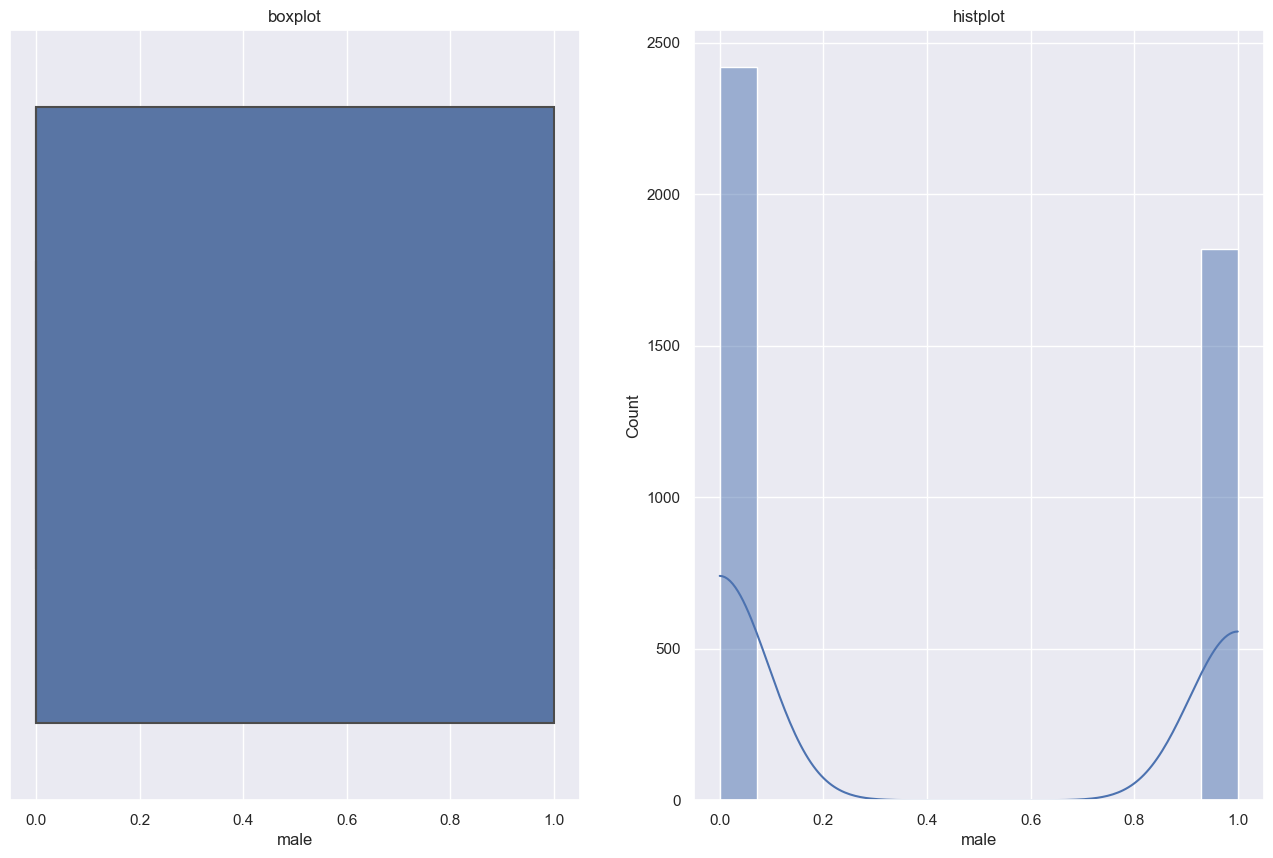

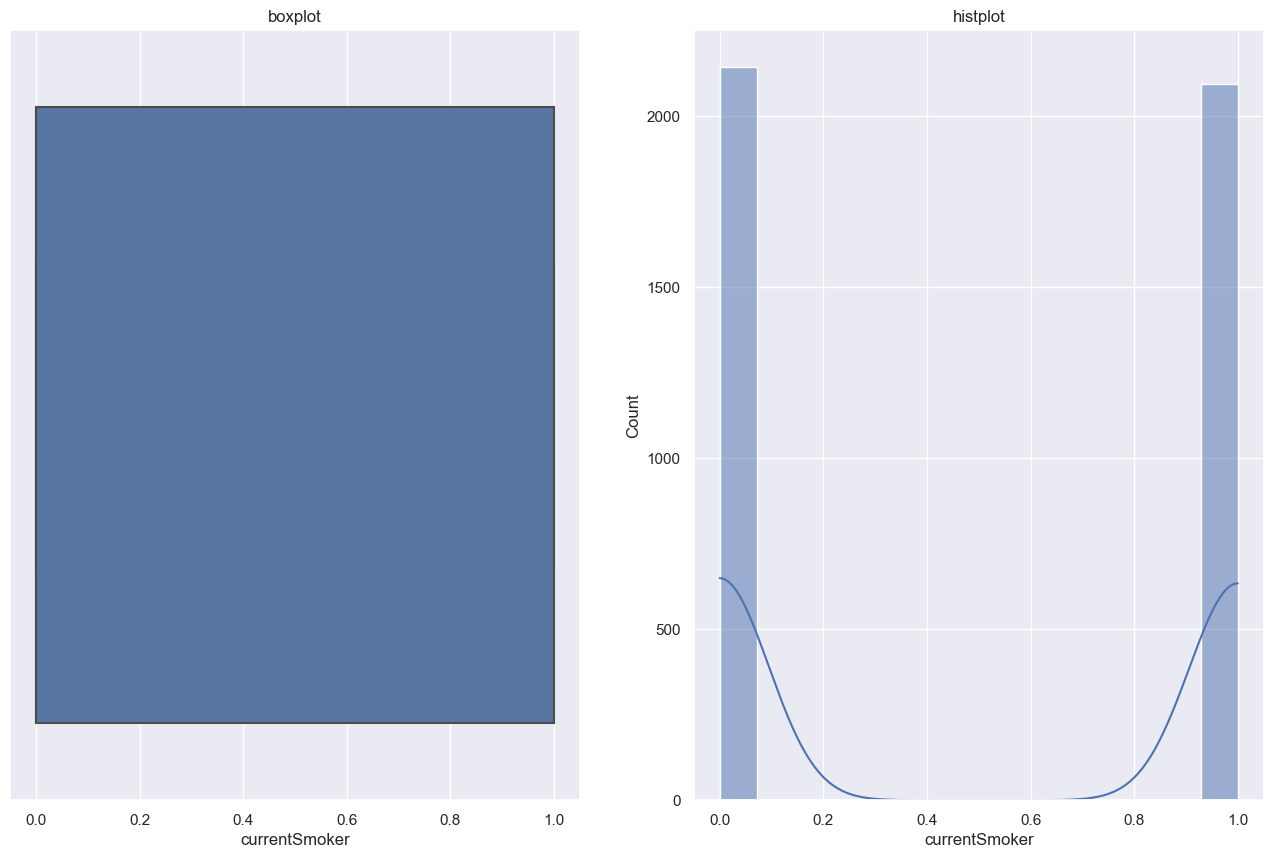

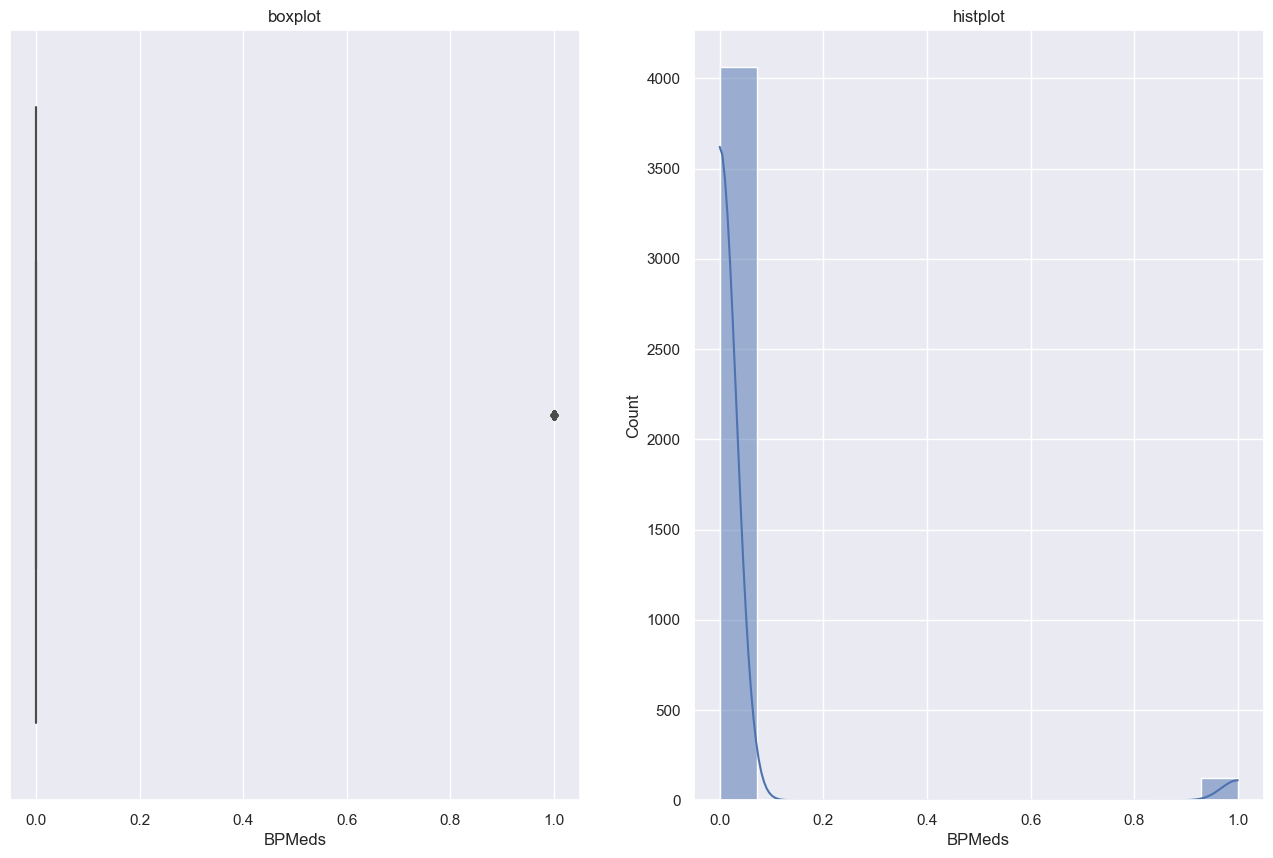

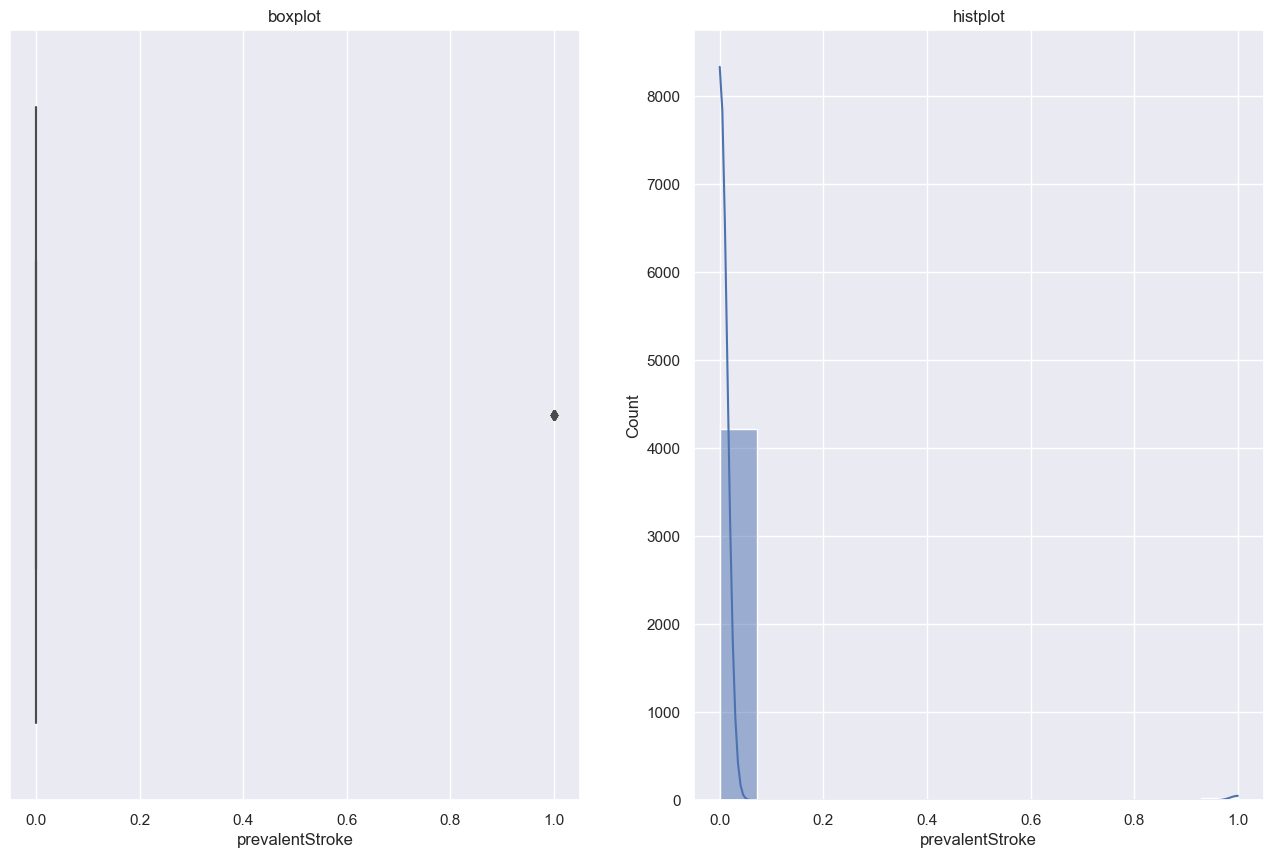

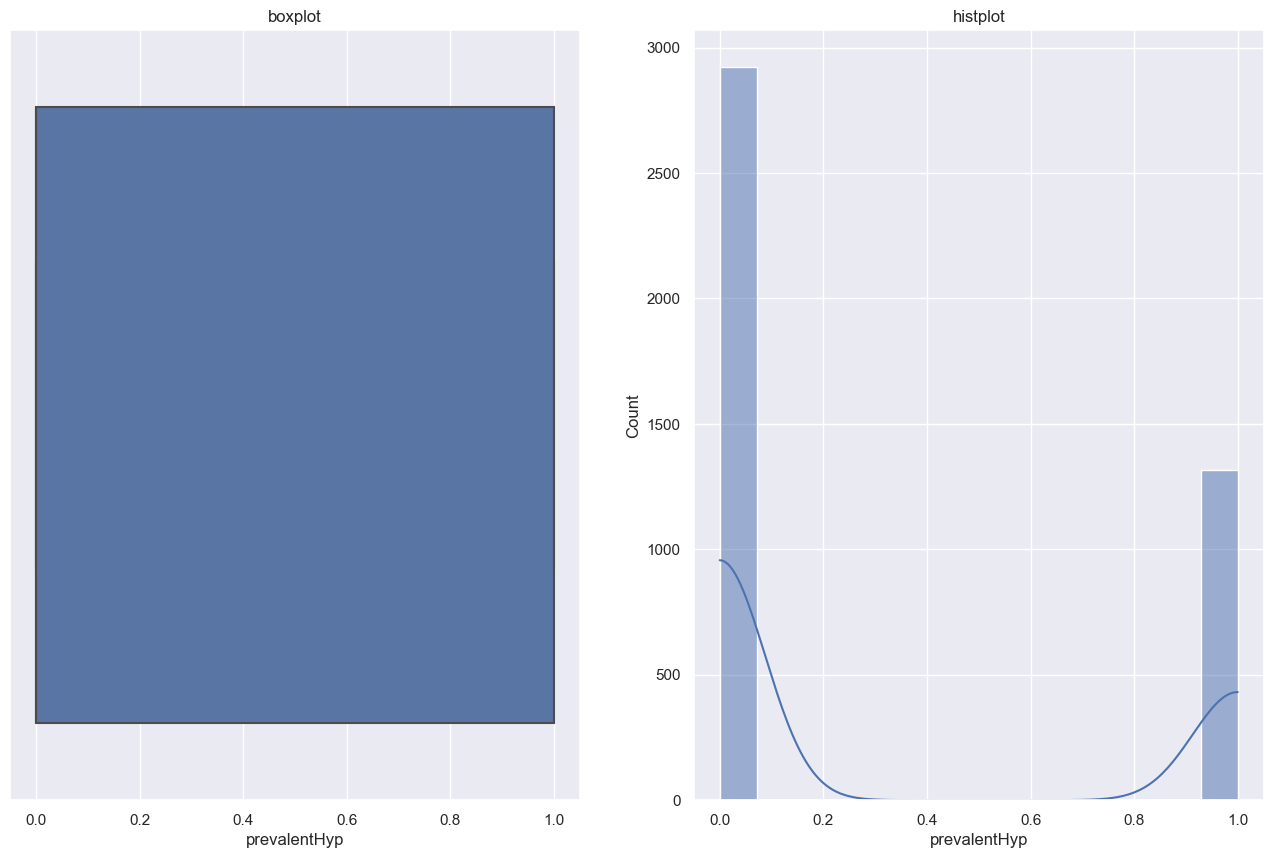

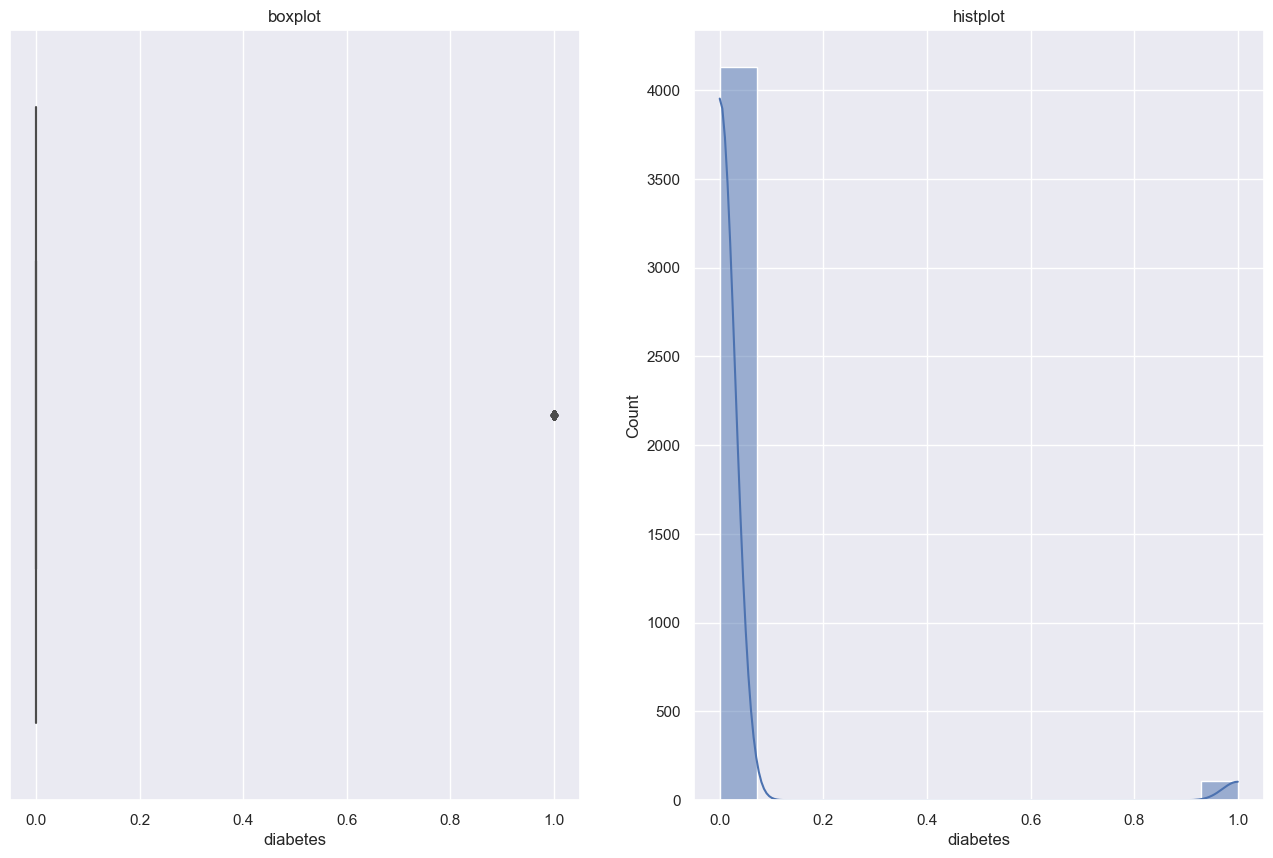

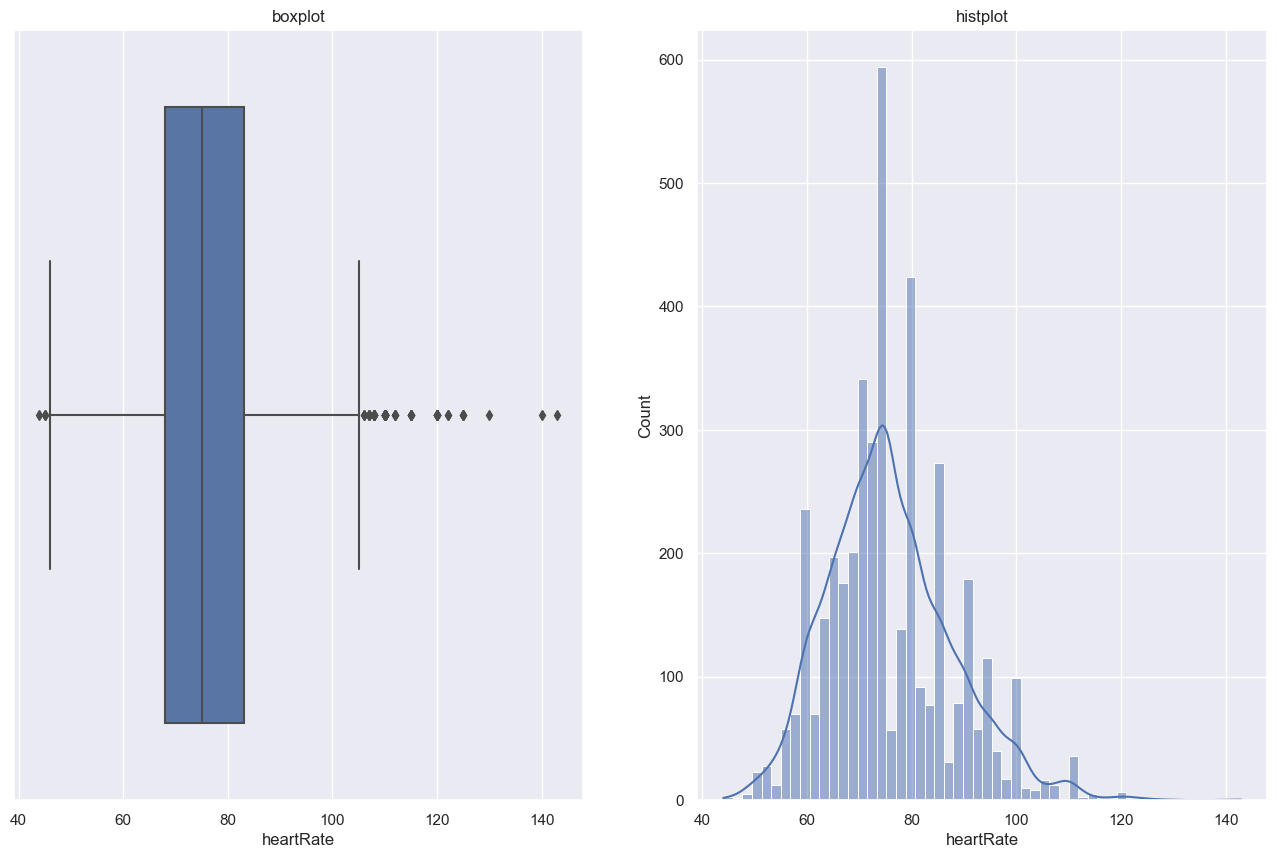

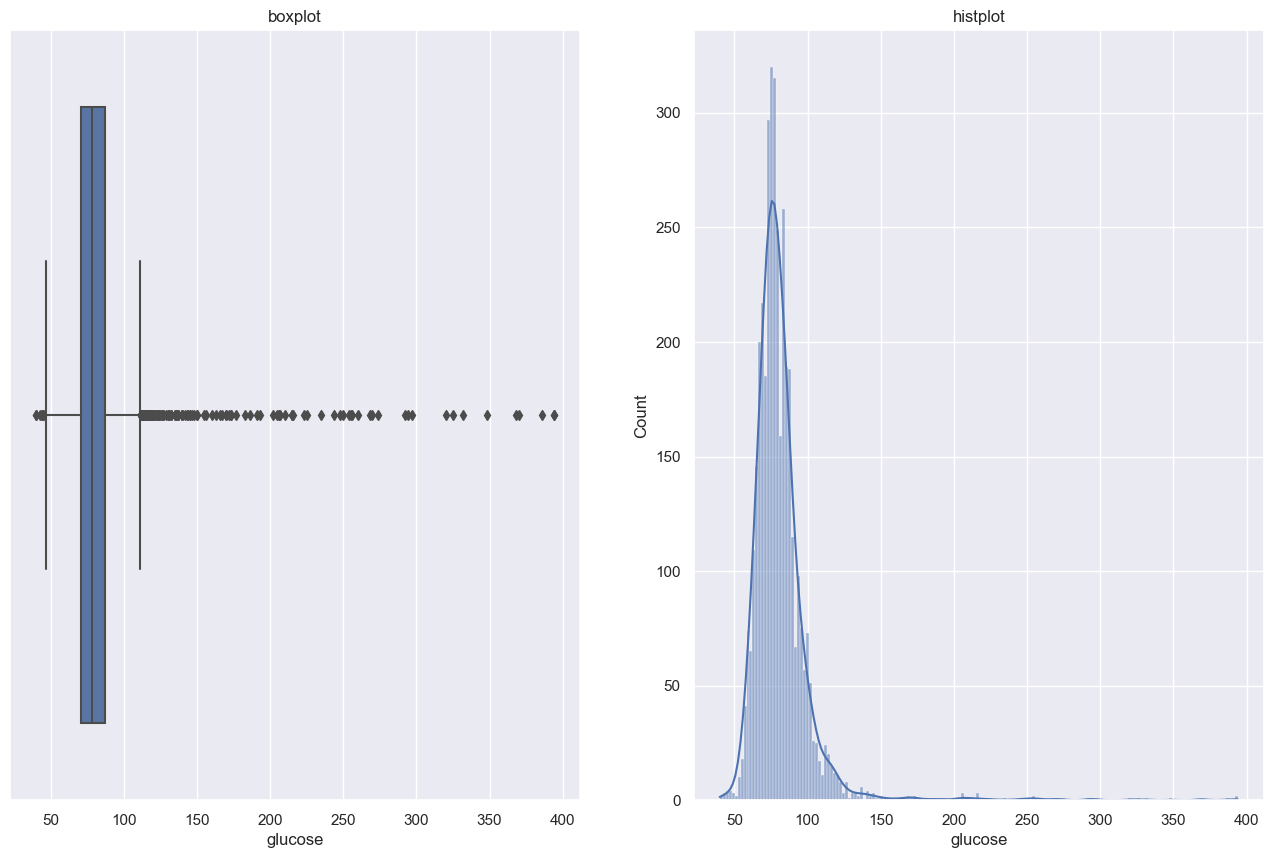

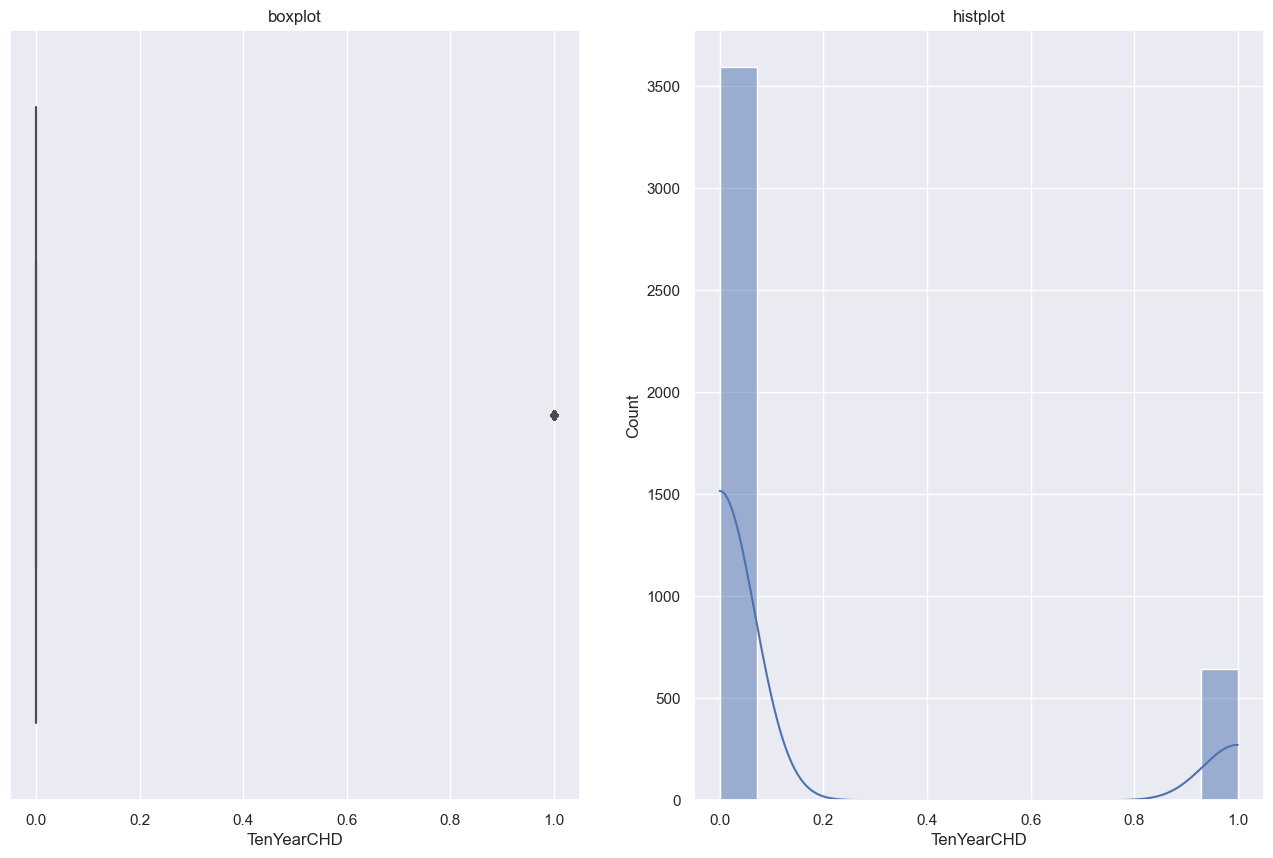

In [68]:
for i in numerical_columns:
    uni_numerical_analysis(df_farmingham,i)


In [69]:
categorical_columns=[  'cigsPerDay','totChol', 'sysBP',
       'diaBP', 'BMI']

In [70]:
def uni_numerical_analysis(dataframe,columns):
    sns.set(style="darkgrid")
    plt.figure(figsize=(25,10))

    plt.subplot(1,3,1)
    sns.boxplot(data=dataframe,x=columns,orient="v").set(title="boxplot")

    plt.subplot(1,3,2)
    sns.histplot(dataframe[columns],kde=True).set(title="histplot")

    plt.show()

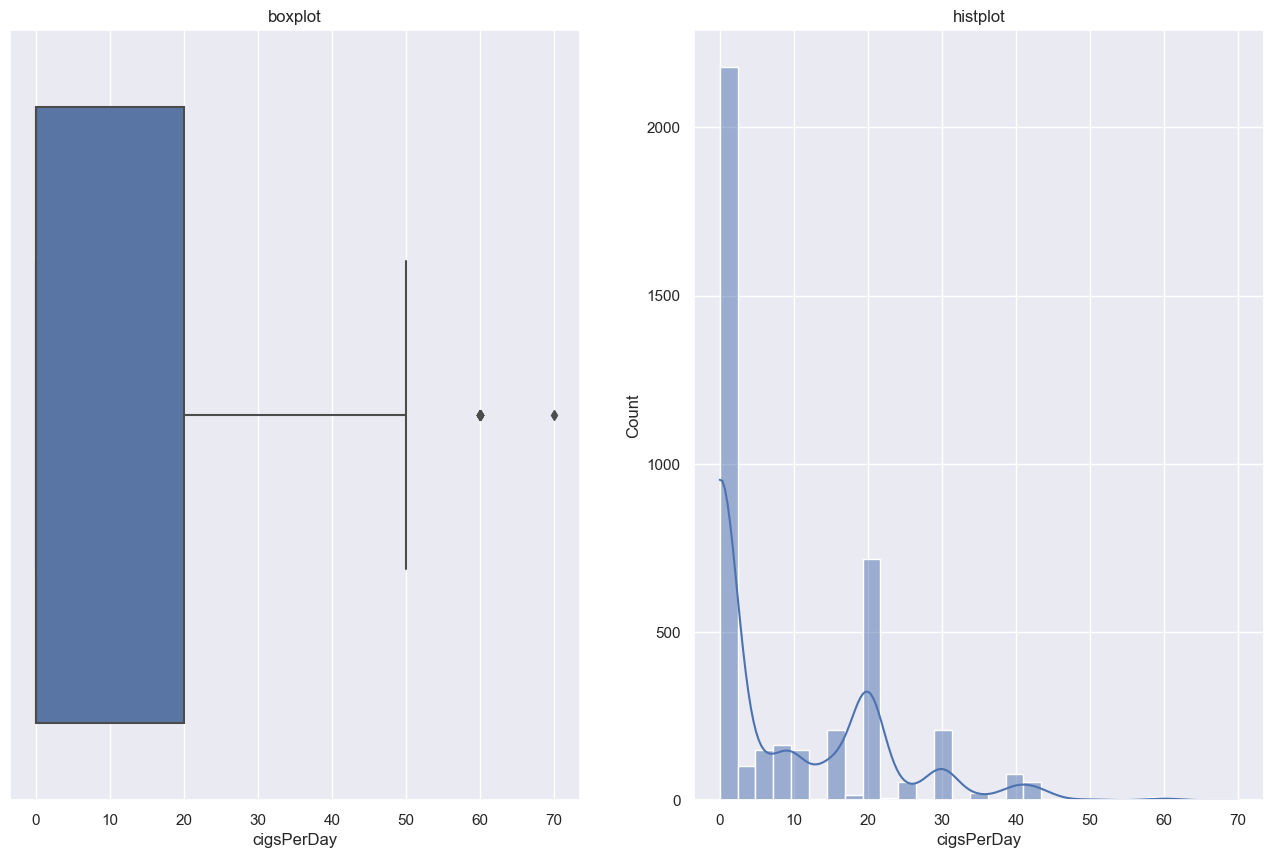

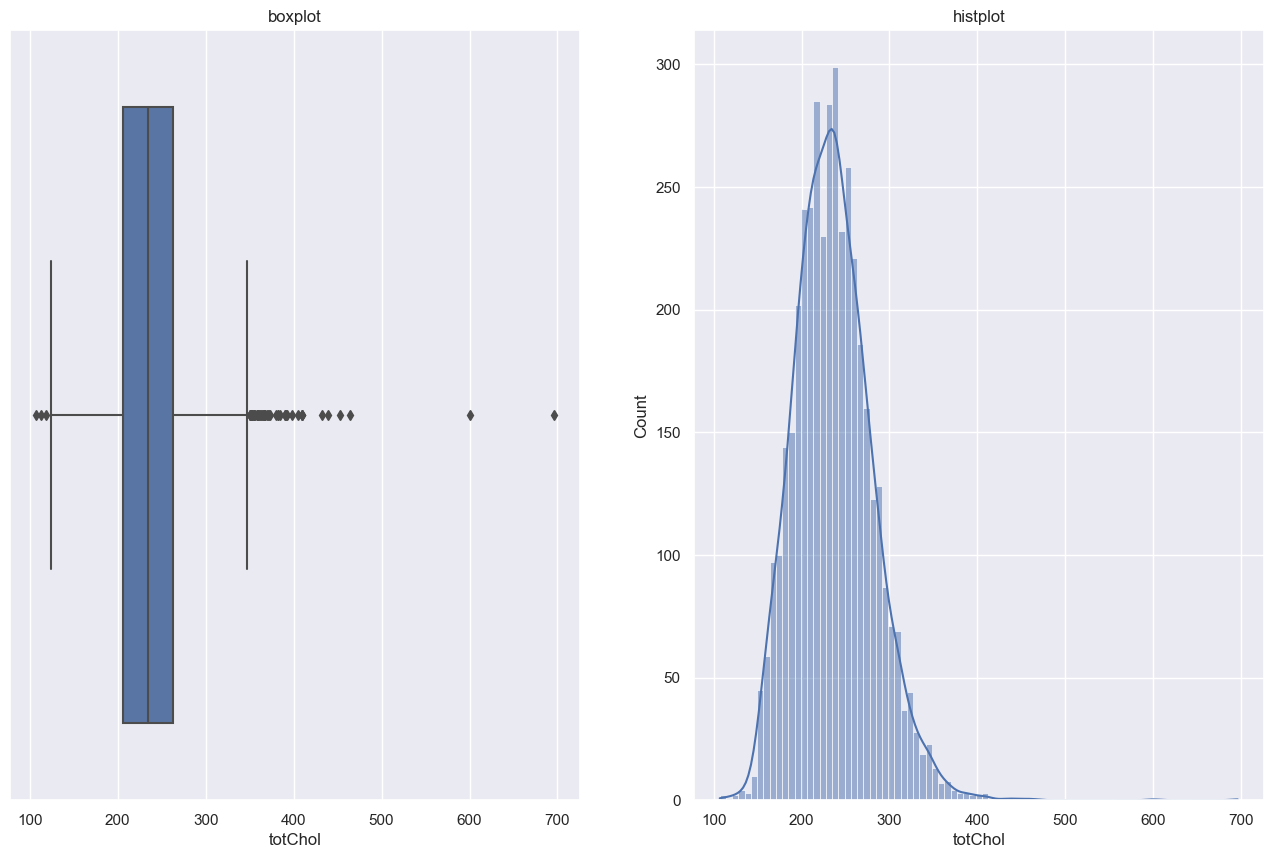

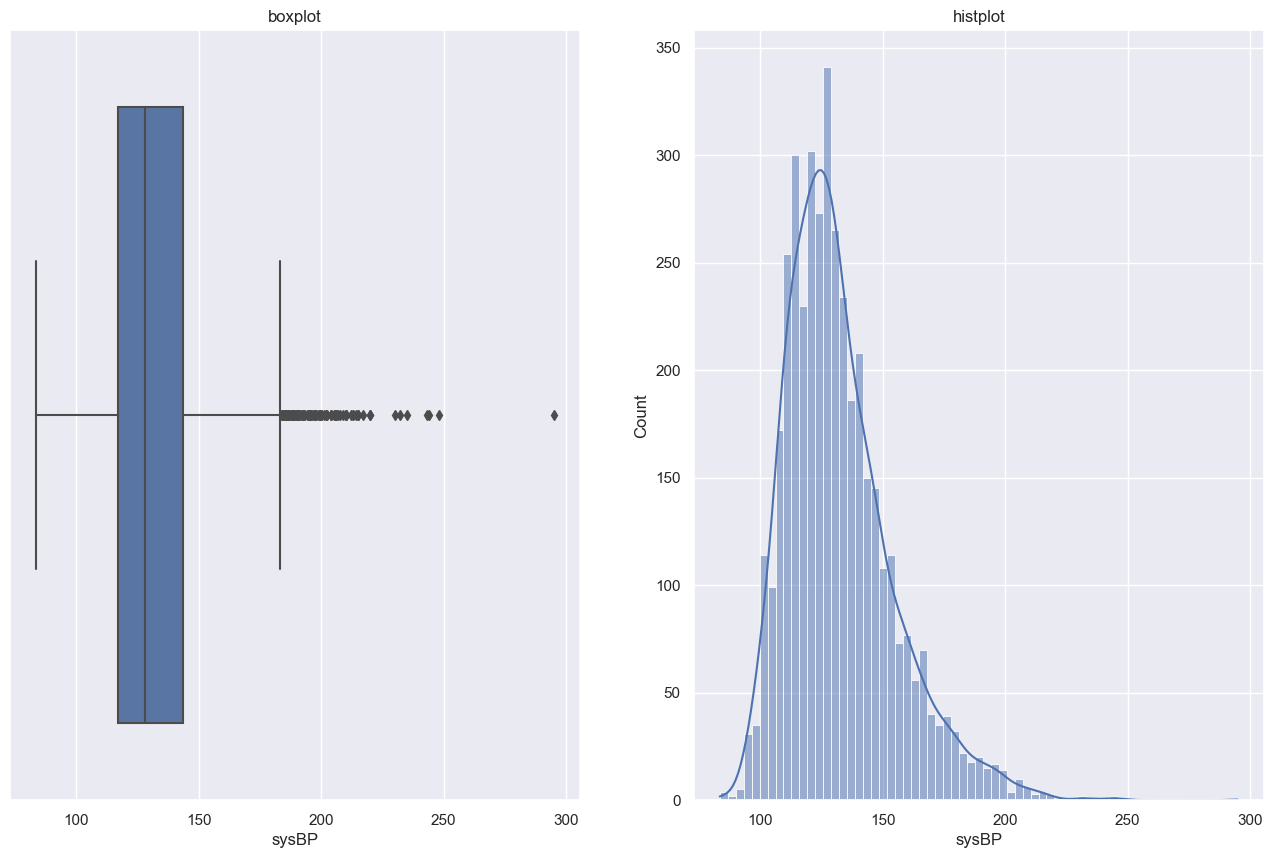

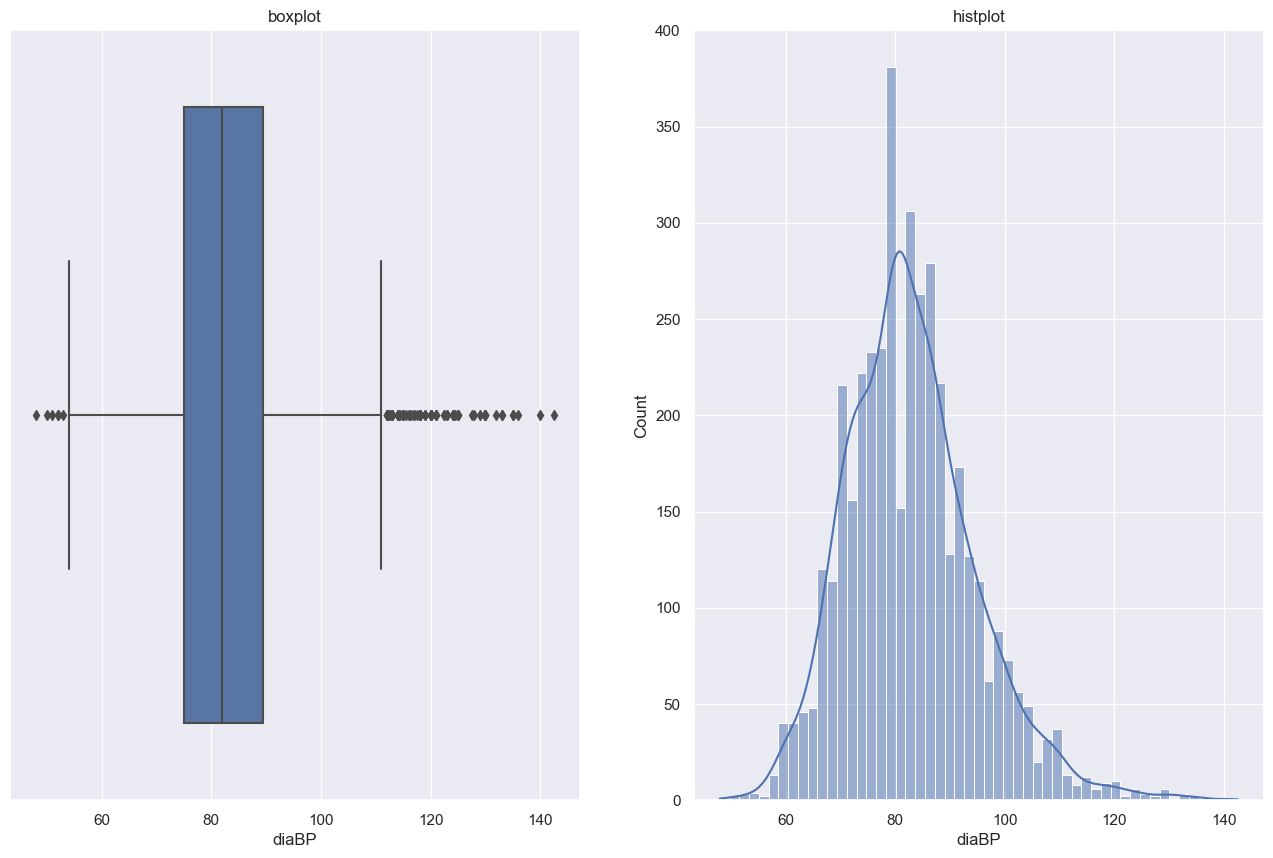

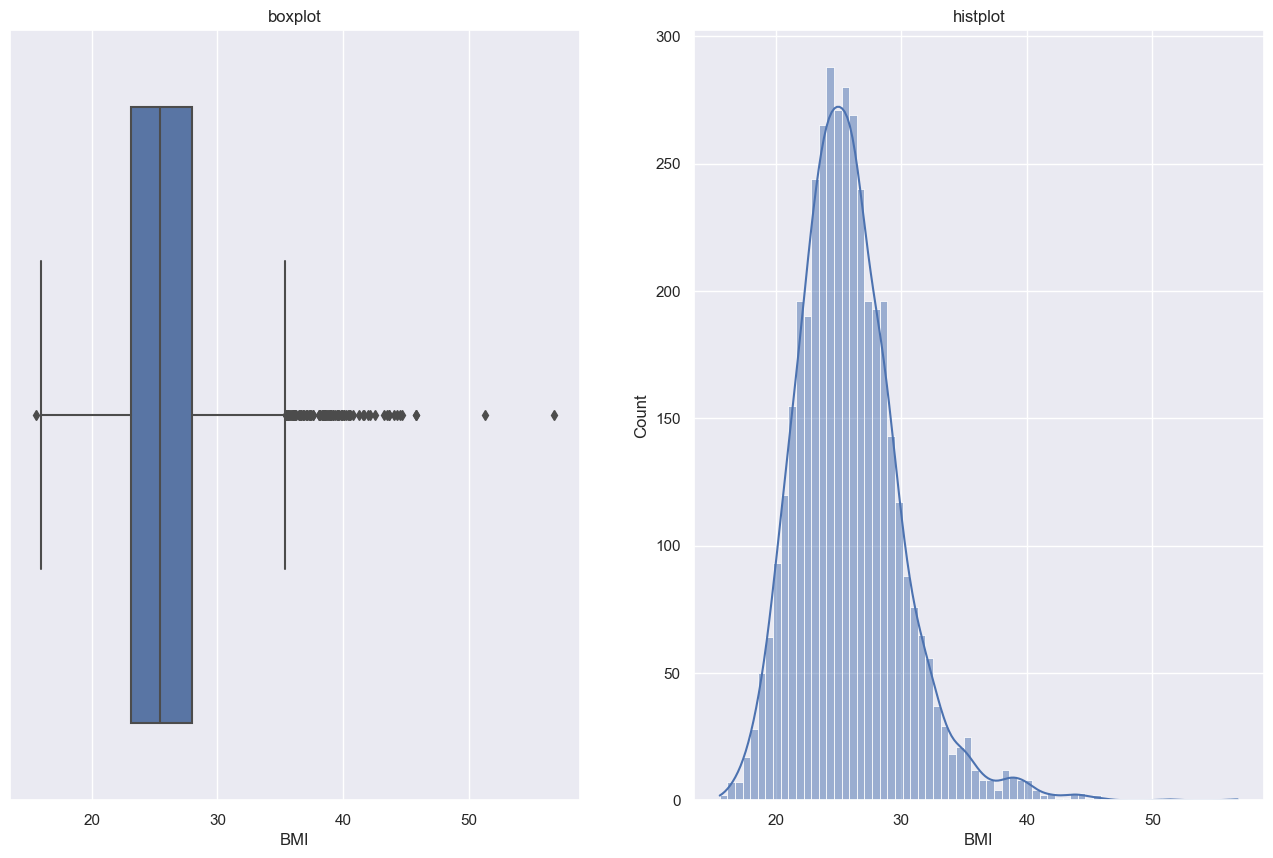

In [71]:
for i in categorical_columns:
    uni_numerical_analysis(df_fhs,i)


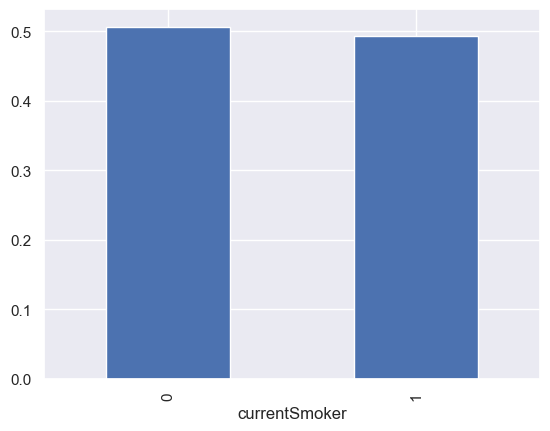

In [72]:
df_fhs['currentSmoker'].value_counts(normalize=True).plot(kind='bar')
plt.show()

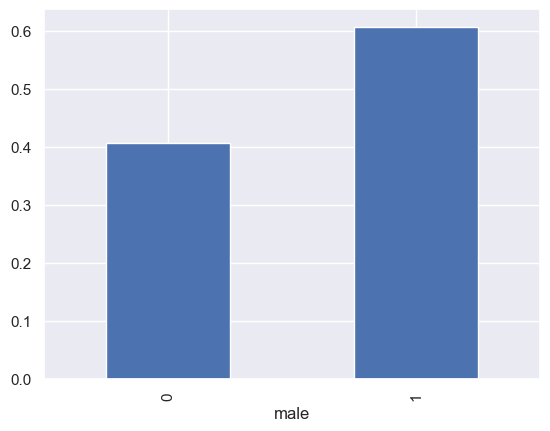

In [73]:
df_fhs.groupby('male')['currentSmoker'].mean().plot(kind='bar')
plt.show()

In [74]:
df_fhs['sex_cat']=df_fhs['male'].replace([0,1],["female","male"])

In [75]:
df_fhs['sex_cat']

0         male
1       female
2         male
3       female
4       female
         ...  
4234      male
4236    female
4237    female
4238      male
4239    female
Name: sex_cat, Length: 4137, dtype: object

In [76]:
df_fhs.groupby('sex_cat')['currentSmoker'].mean()

sex_cat
female    0.405983
male      0.607123
Name: currentSmoker, dtype: float64

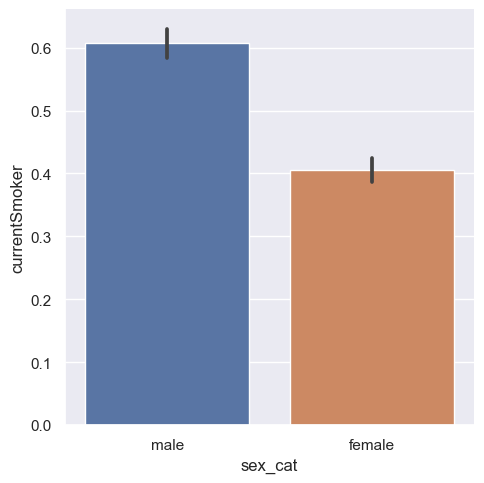

In [77]:
sns.catplot(data=df_fhs,y='currentSmoker',x='sex_cat',kind='bar')
plt.show()

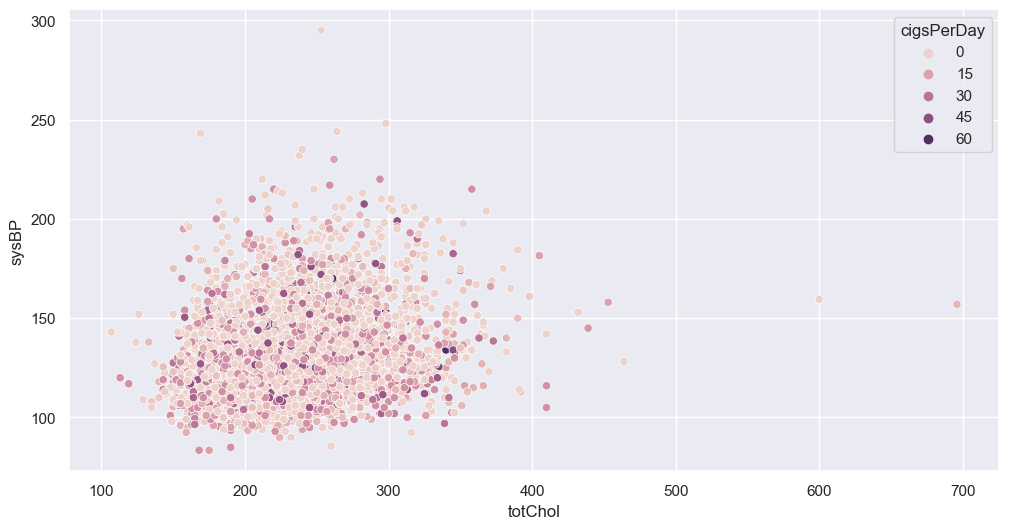

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_fhs,y='sysBP',x='totChol',hue='cigsPerDay')
plt.show()


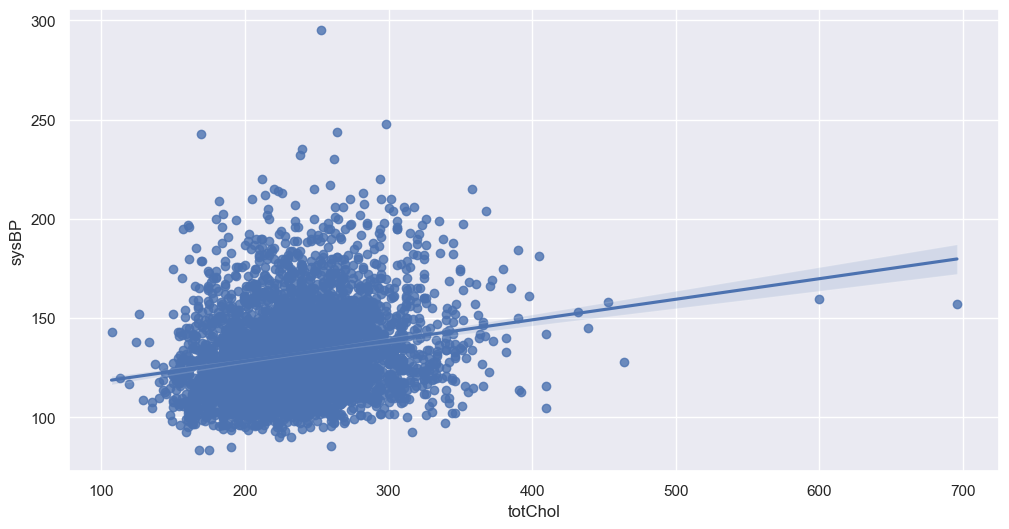

In [79]:
plt.figure(figsize=(12,6))
sns.regplot(data=df_fhs,y='sysBP',x='totChol')
plt.show()


In [80]:
fhs_cat=df_farmingham.select_dtypes(include=['category'])
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Empty DataFrame


In [81]:
fhs_cat.nunique().sort_values()

Series([], dtype: float64)

In [82]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Limit the number of plots to 15
# num_plots = min(15, len(df_fhs.columns))

# plt.figure(figsize=(15,10))

# for i, col in enumerate(df_fhs.columns[:num_plots]):  # Restrict to 15 columns
#     plt.subplot(3, 5, i + 1)  # Ensure index stays within 1-15
#     sns.countplot(x=col, hue='cigsPerDay', data=df_fhs)
#     plt.title(col)

# plt.tight_layout()
# plt.show()


In [83]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Ensure 'cigsPerDay' exists in the dataset
# if 'cigsPerDay' not in df_fhs.columns:
#     print("Error: Column 'cigsPerDay' not found in df_fhs")
# else:
#     numerical_columns = min(15, len(df_fhs.columns))  # Limit to 15 columns
#     selected_columns = df_fhs.columns[:numerical_columns]  # Take only the first 15 columns

#     fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Create a 3x5 grid
#     axes = axes.flatten()  # Flatten the 2D array of axes to a 1D list

#     for i, columns in enumerate(selected_columns):
#         sns.countplot(x=columns, hue='cigsPerDay', data=df_fhs, ax=axes[i])
#         axes[i].set_title(columns)

#     plt.tight_layout()
#     plt.show()


In [84]:
col_int=df_fhs.nunique().reset_index()

In [85]:
col_int

index     0
0              male     2
1               age    39
2     currentSmoker     2
3        cigsPerDay    34
4            BPMeds     2
5   prevalentStroke     2
6      prevalentHyp     2
7          diabetes     2
8           totChol   248
9             sysBP   233
10            diaBP   146
11              BMI  1352
12        heartRate    73
13          glucose   143
14       TenYearCHD     2
15          sex_cat     2

type casting categorical values

In [86]:
col_int.columns=['features','categories']
col_int['categories']=col_int['categories'].astype('int64')

In [87]:
col_int['categories']

0        2
1       39
2        2
3       34
4        2
5        2
6        2
7        2
8      248
9      233
10     146
11    1352
12      73
13     143
14       2
15       2
Name: categories, dtype: int64

In [88]:
col_int=col_int.sort_values(by='categories')
col_int=col_int[col_int.categories<10]
col_int.features.values

array(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD', 'sex_cat'], dtype=object)

In [89]:
col_int

features  categories
0              male           2
2     currentSmoker           2
4            BPMeds           2
5   prevalentStroke           2
6      prevalentHyp           2
7          diabetes           2
14       TenYearCHD           2
15          sex_cat           2

In [90]:
##display the sbset of integer type categorical valus
fhs_cat=df_fhs[col_int.features.values]

In [91]:
fhs_cat

male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        1              0     0.0                0             0         0   
1        0              0     0.0                0             0         0   
2        1              1     0.0                0             0         0   
3        0              1     0.0                0             1         0   
4        0              1     0.0                0             0         0   
...    ...            ...     ...              ...           ...       ...   
4234     1              1     0.0                0             0         0   
4236     0              1     0.0                0             0         0   
4237     0              0     0.0                0             0         0   
4238     1              0     0.0                0             1         0   
4239     0              1     0.0                0             0         0   

      TenYearCHD sex_cat  
0              0    male  
1              0  female  
2              0    male  
3              1  female  
4              0  female  
...          ...     ...  
4234           0    male  
4236           0  female  
4237           0  female  
4238           0    male  
4239           0  female  

[4137 rows x 8 columns]

<Axes: xlabel='male', ylabel='count'>

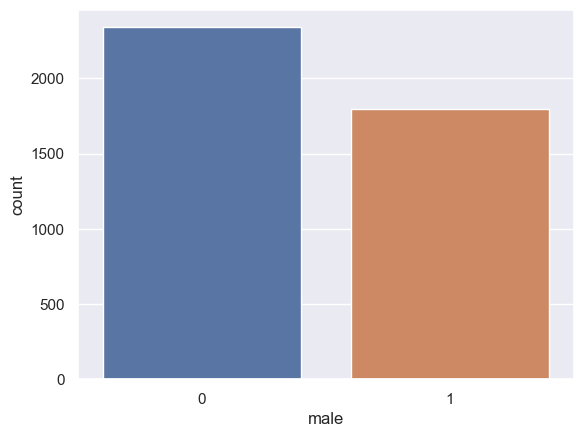

In [92]:
sns.countplot(data=fhs_cat, x='male')

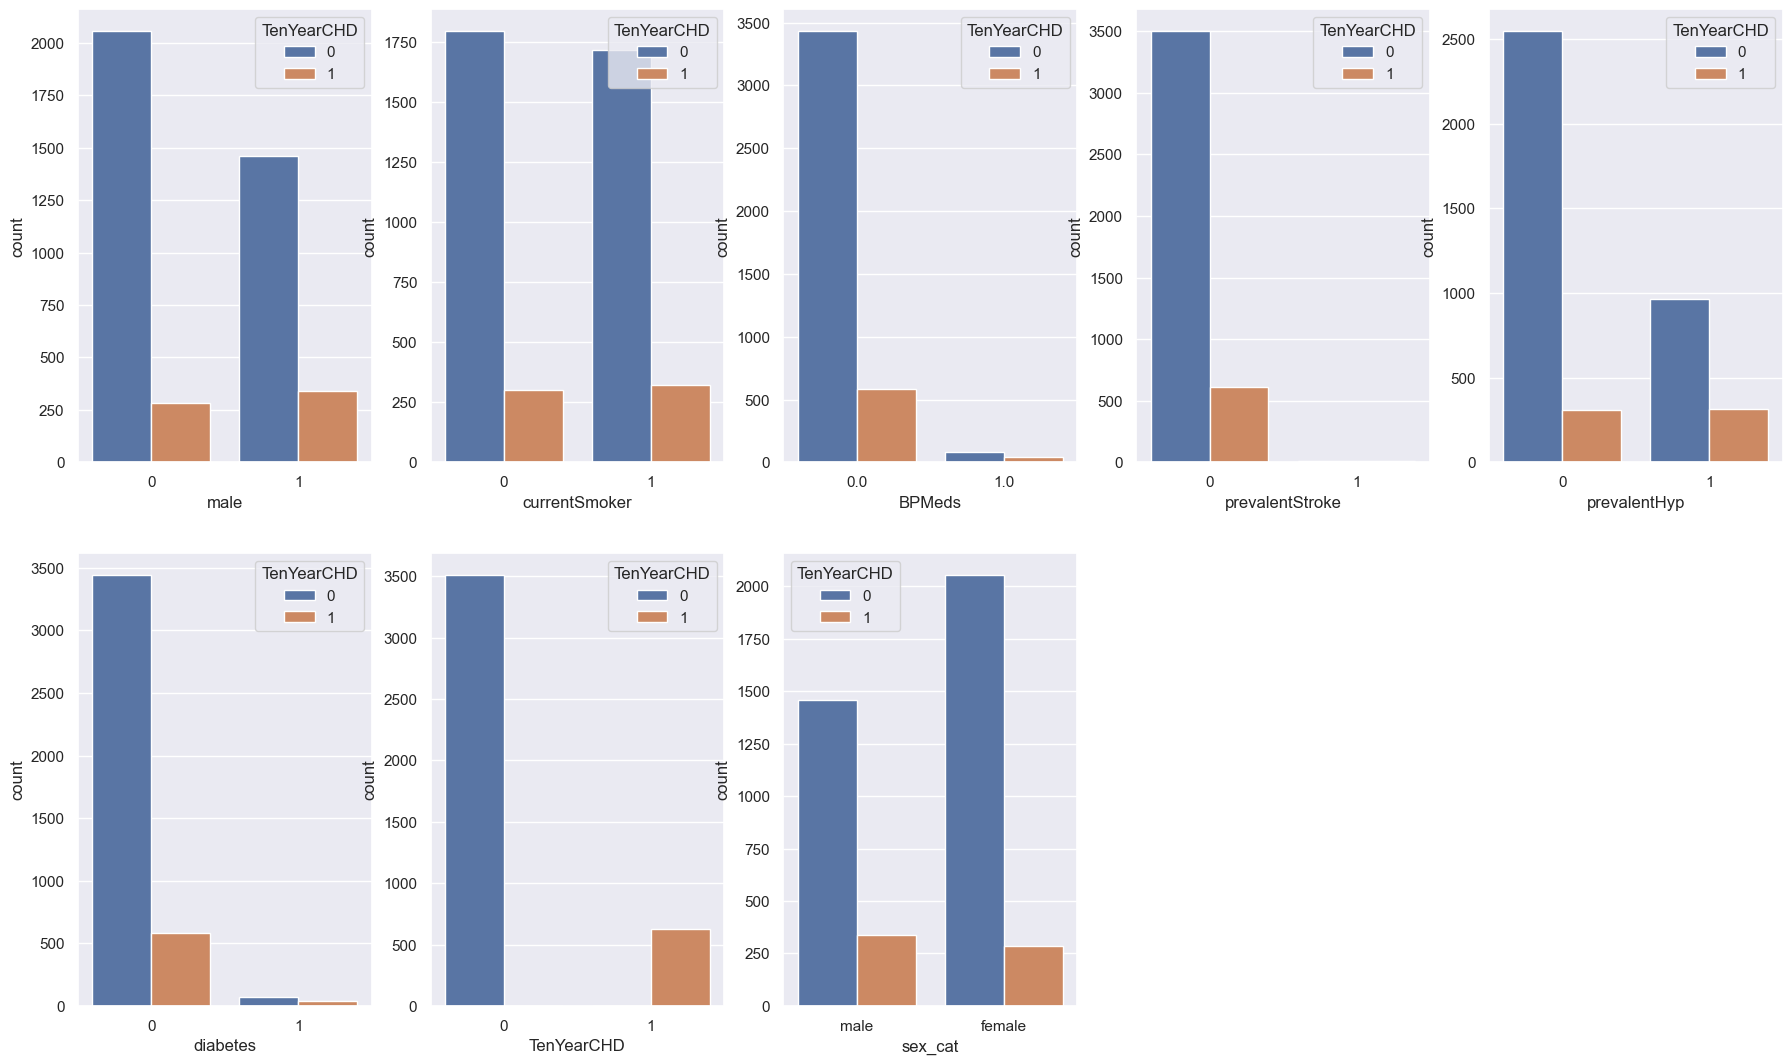

In [93]:
plt.figure(figsize=(22,20))
for i in enumerate(fhs_cat.columns):
    plt.subplot(3,5,i[0]+1)

    sns.countplot(x=i[1],hue='TenYearCHD',data=fhs_cat)

In [94]:
fhs_cont=df_fhs.select_dtypes(include=['float'])

In [95]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4137 non-null   float64
 1   BPMeds      4137 non-null   float64
 2   totChol     4137 non-null   float64
 3   sysBP       4137 non-null   float64
 4   diaBP       4137 non-null   float64
 5   BMI         4137 non-null   float64
 6   heartRate   4137 non-null   float64
 7   glucose     4137 non-null   float64
dtypes: float64(8)
memory usage: 290.9 KB


In [96]:
fhs_cont.corr()

cigsPerDay    BPMeds   totChol     sysBP     diaBP       BMI  \
cigsPerDay    1.000000 -0.044614 -0.025680 -0.084820 -0.049764 -0.090527   
BPMeds       -0.044614  1.000000  0.080608  0.255366  0.194639  0.101804   
totChol      -0.025680  0.080608  1.000000  0.209770  0.166261  0.120989   
sysBP        -0.084820  0.255366  0.209770  1.000000  0.784683  0.328370   
diaBP        -0.049764  0.194639  0.166261  0.784683  1.000000  0.381620   
BMI          -0.090527  0.101804  0.120989  0.328370  0.381620  1.000000   
heartRate     0.071919  0.014042  0.091909  0.182282  0.179524  0.071642   
glucose      -0.053550  0.049864  0.044963  0.135398  0.060772  0.082042   

            heartRate   glucose  
cigsPerDay   0.071919 -0.053550  
BPMeds       0.014042  0.049864  
totChol      0.091909  0.044963  
sysBP        0.182282  0.135398  
diaBP        0.179524  0.060772  
BMI          0.071642  0.082042  
heartRate    1.000000  0.091989  
glucose      0.091989  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

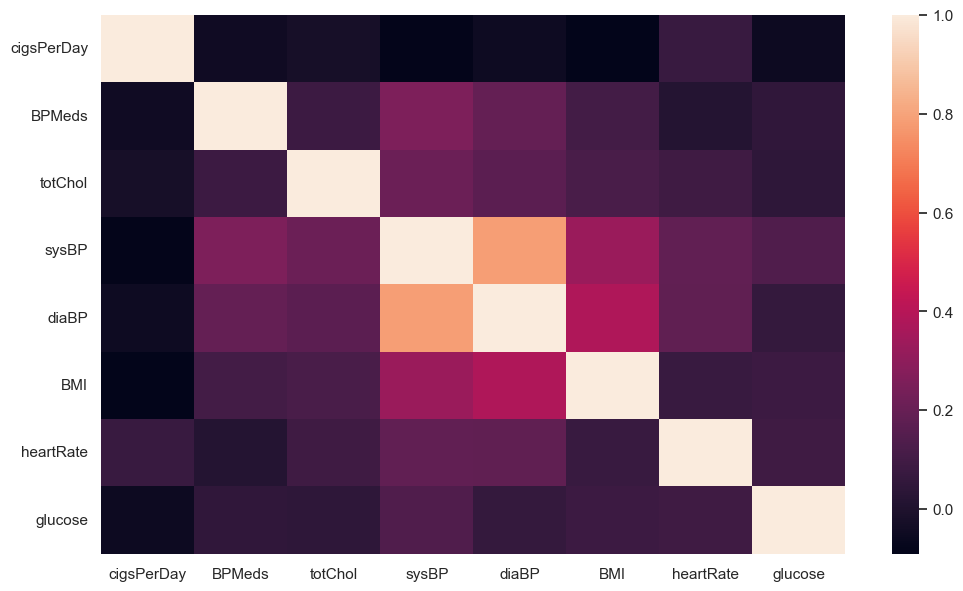

In [97]:
plt.figure(figsize=(12,7))

sns.heatmap(fhs_cont.corr(),color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

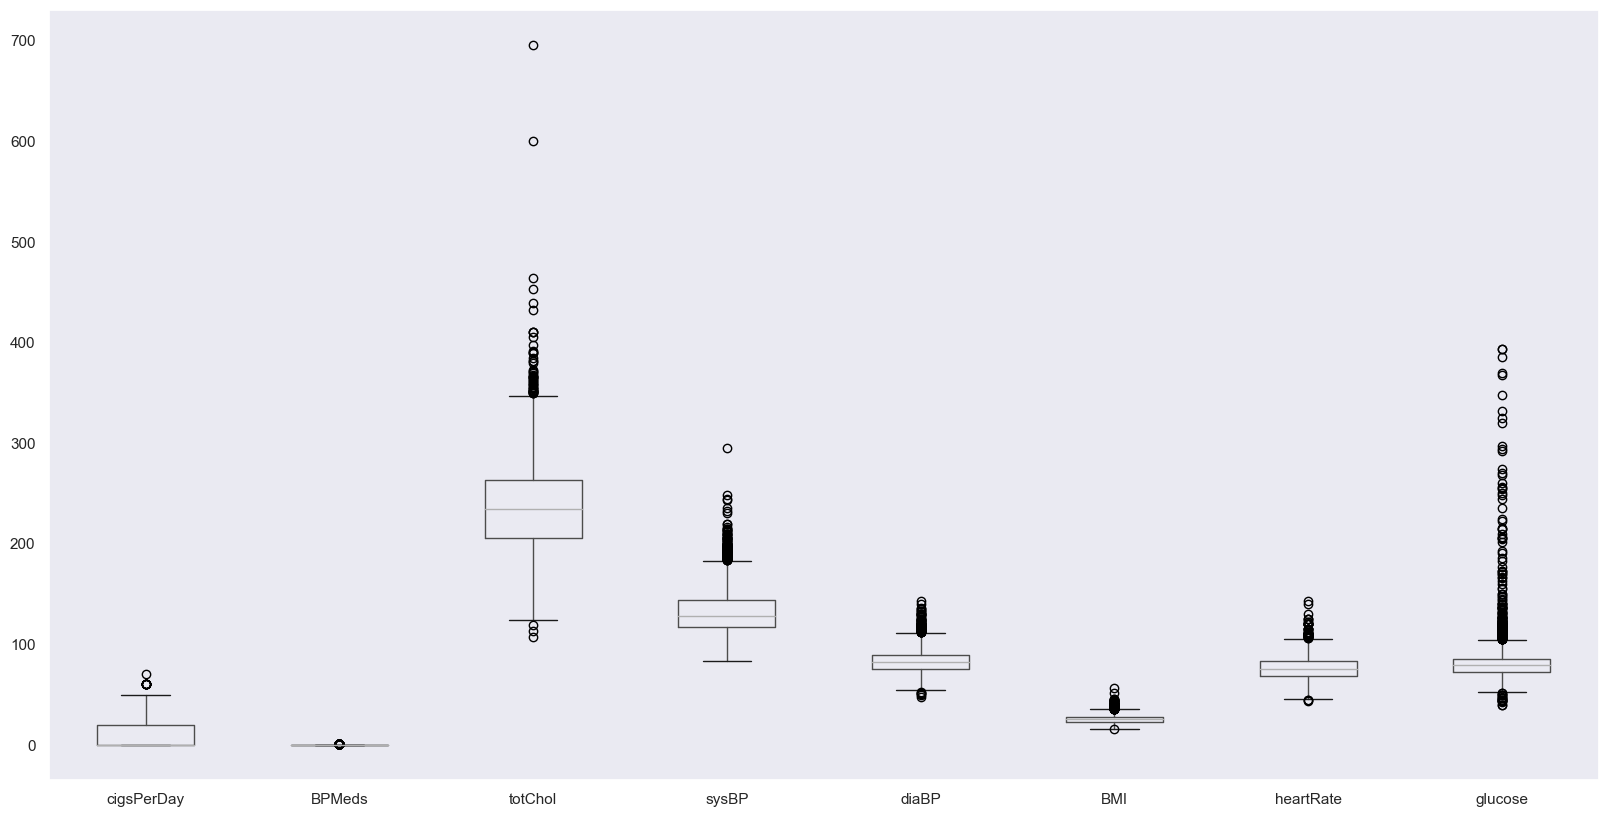

In [98]:
plt.figure(figsize=(20,10))
fhs_cont.boxplot(grid=False)
plt.show

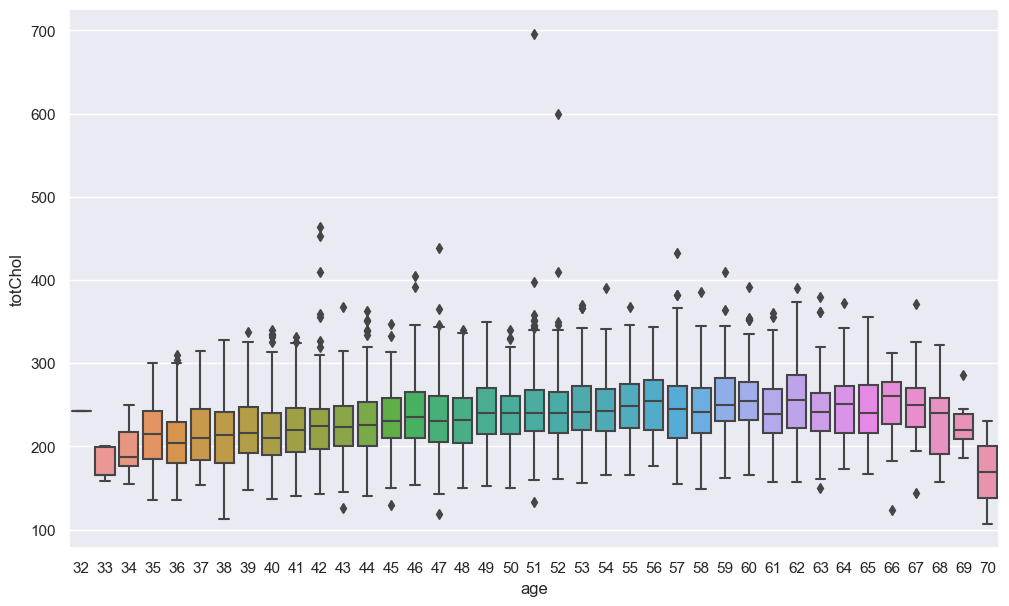

In [99]:
fig,ax=plt.subplots(figsize=(12,7))
sns.boxplot(data=df_fhs,x='age',y='totChol',ax=ax)
plt.show()

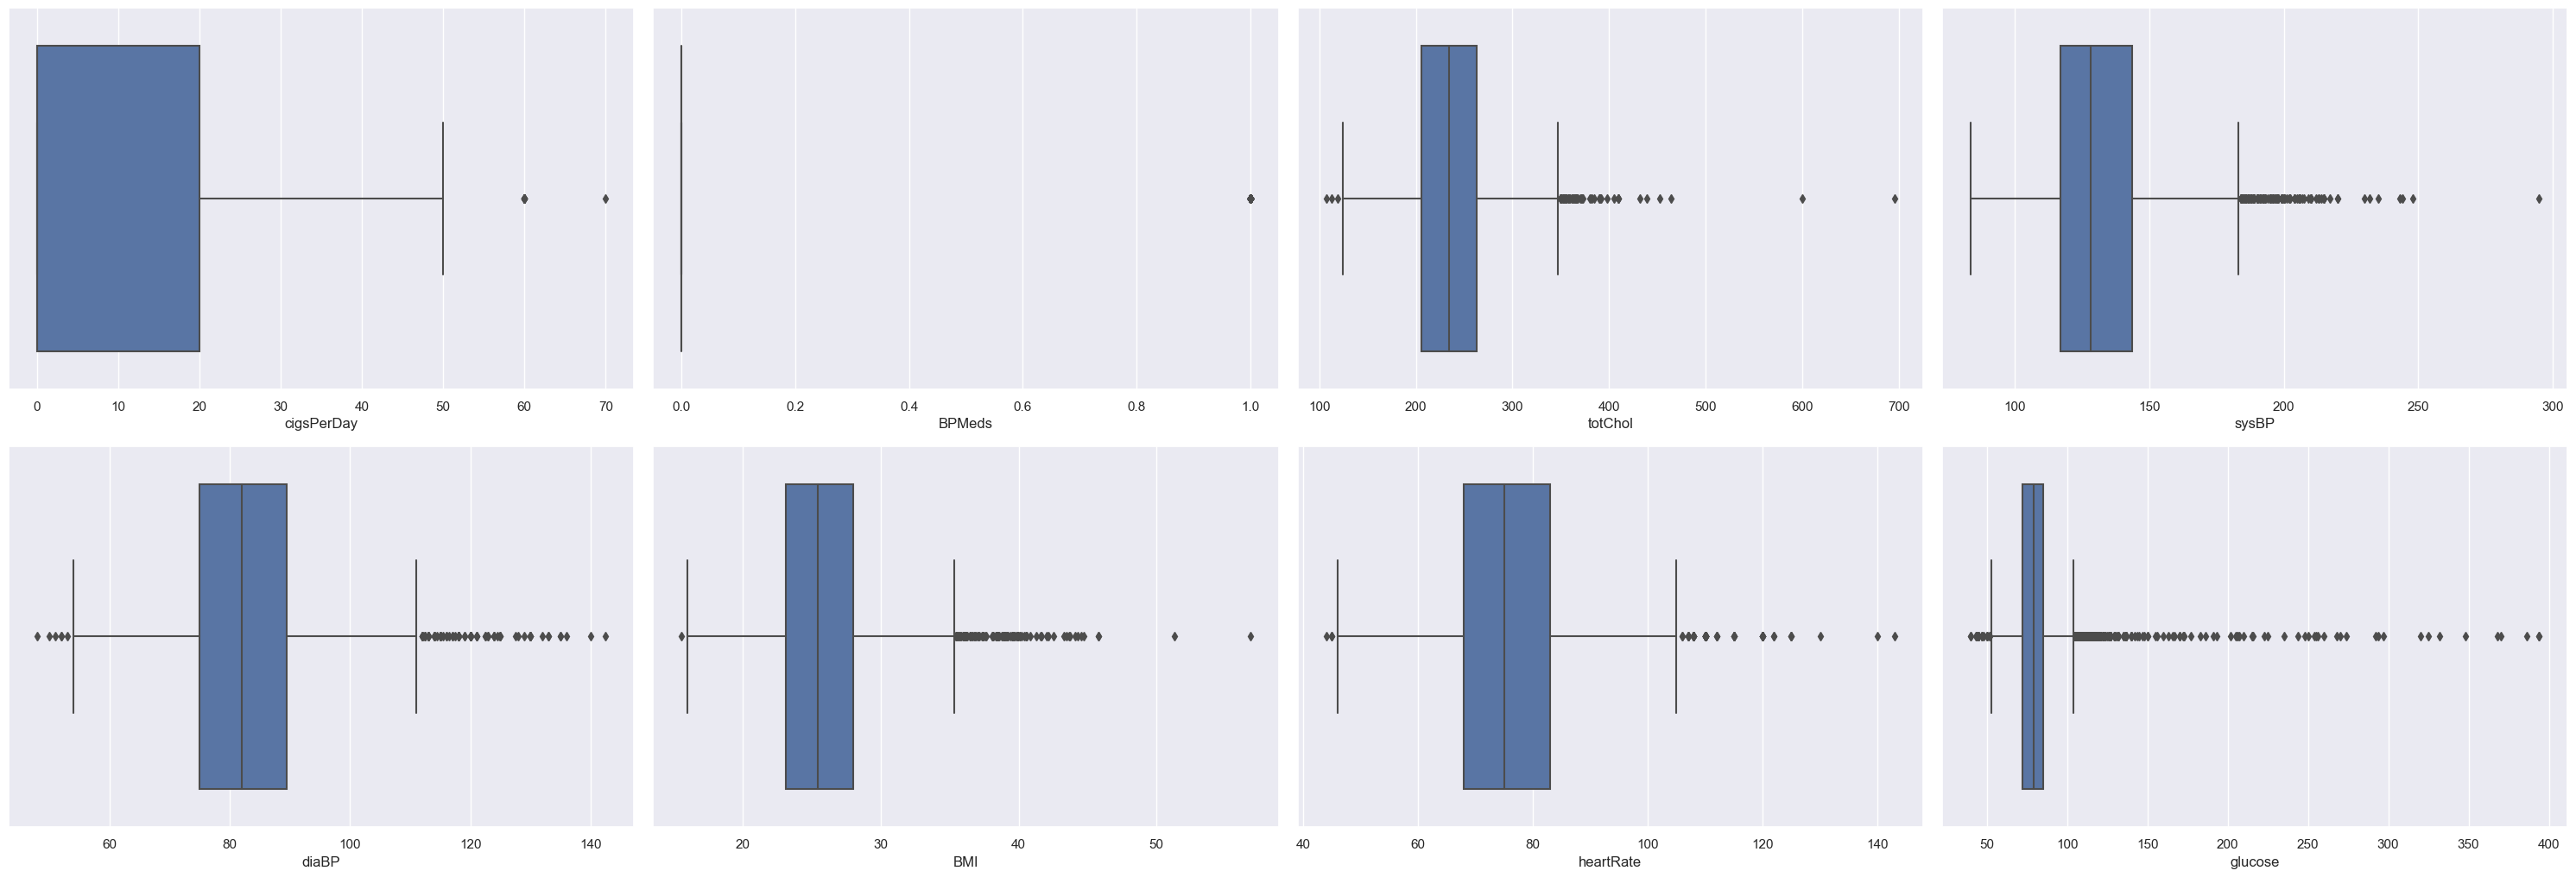

In [100]:
plt.figure(figsize=(30,20))
for i in enumerate(fhs_cont.columns):
    plt.subplot(4,4,i[0]+1)


    sns.boxplot(x=i[1],data=fhs_cont)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

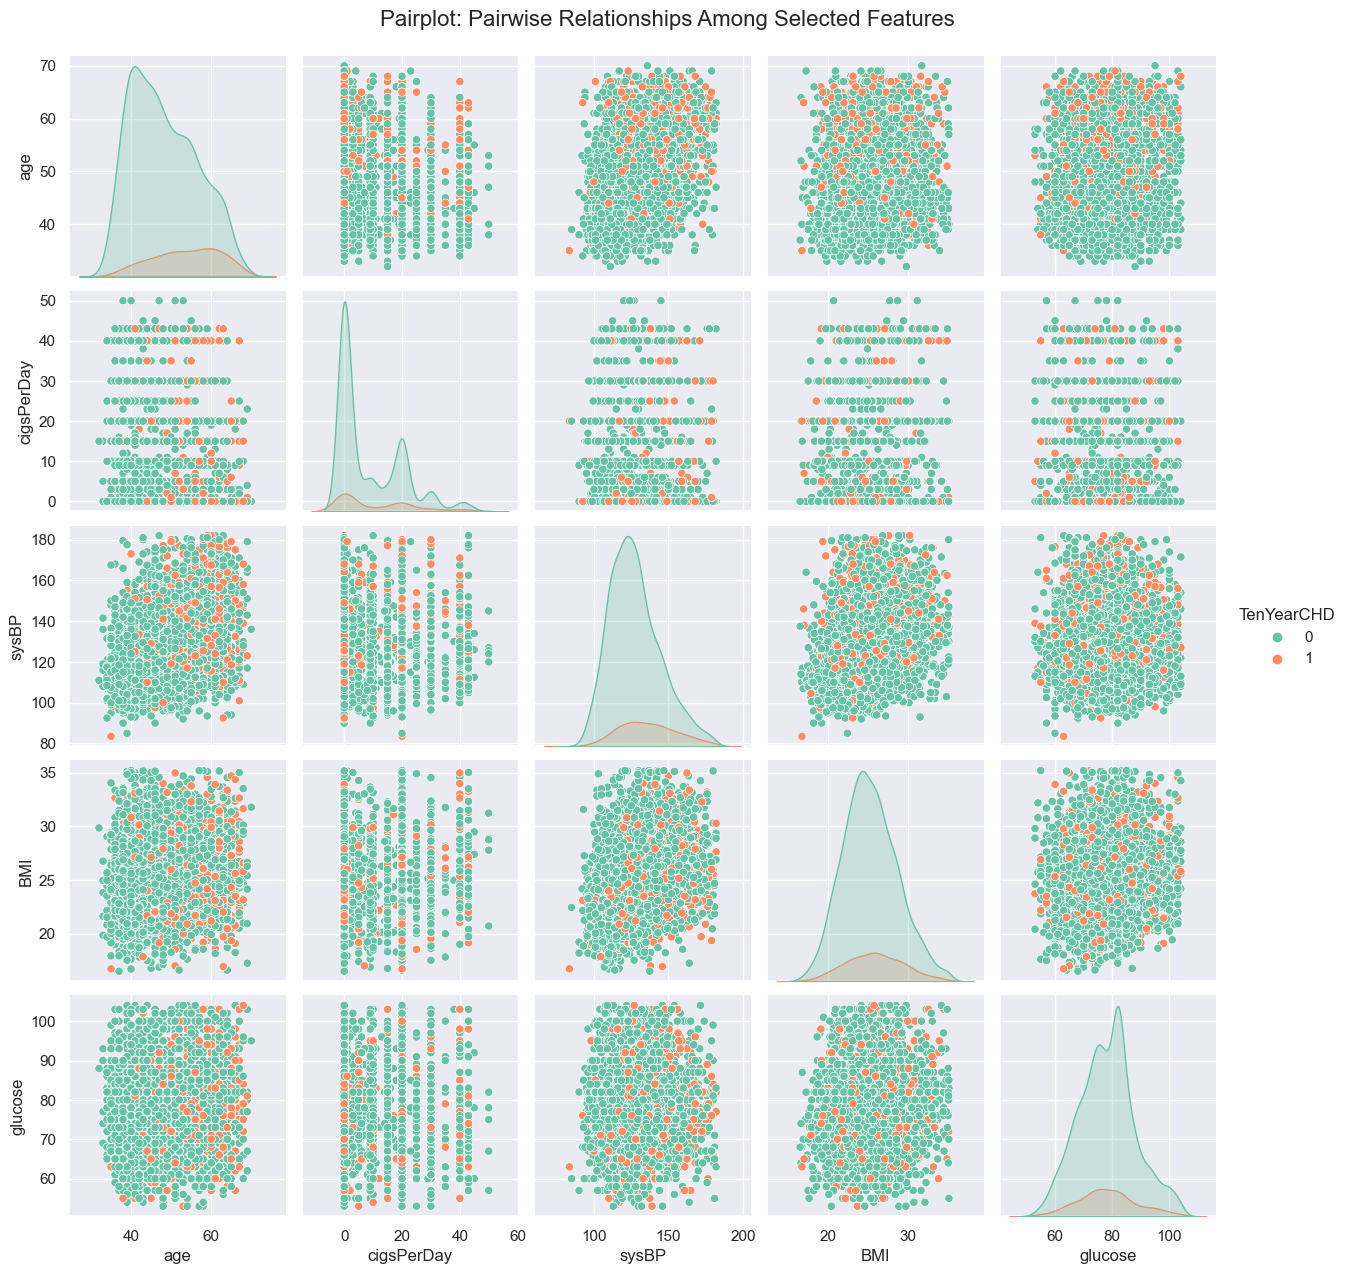

In [101]:
#Pairplot: Pairwise Relationships (using target variable for hue)
plt.figure(figsize=(12,10))

pairplot_columns = ['age', 'cigsPerDay', 'sysBP', 'BMI', 'glucose', 'TenYearCHD']
sns.pairplot(df_cleaned[pairplot_columns], hue="TenYearCHD", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot: Pairwise Relationships Among Selected Features", y=1.02, fontsize=16)
plt.show()

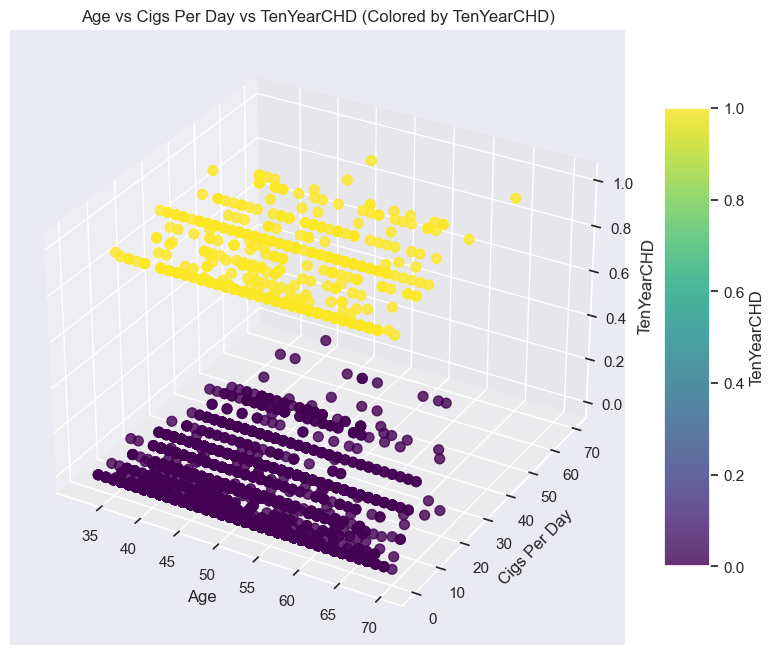

In [102]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(
    df_fhs['age'],
    df_fhs['cigsPerDay'],
    df_fhs['TenYearCHD'],
    c=df_fhs['TenYearCHD'],
    cmap='viridis',
    s=50,
    alpha=0.8
)
# Set axis labels
ax1.set_xlabel("Age")
ax1.set_ylabel("Cigs Per Day")
ax1.set_zlabel("TenYearCHD")
ax1.set_title("Age vs Cigs Per Day vs TenYearCHD (Colored by TenYearCHD)")
cbar = fig.colorbar(scatter, ax=ax1, shrink=0.6, aspect=10)
cbar.set_label('TenYearCHD')
plt.tight_layout()
plt.show()

# generating machine learning model

In [103]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4137 non-null   float64
 1   BPMeds      4137 non-null   float64
 2   totChol     4137 non-null   float64
 3   sysBP       4137 non-null   float64
 4   diaBP       4137 non-null   float64
 5   BMI         4137 non-null   float64
 6   heartRate   4137 non-null   float64
 7   glucose     4137 non-null   float64
dtypes: float64(8)
memory usage: 290.9 KB


In [104]:
# Assuming 'df_fhs' is your original DataFrame
fhs_cont = df_fhs.select_dtypes(include=['number'])  # Select only numerical columns
fhs_cont = fhs_cont.astype(float)  # Convert to float

In [105]:
x=fhs_cont
x.shape

(4137, 15)

In [106]:
y=df_fhs['TenYearCHD']
y.shape

(4137,)

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
os=SMOTE(random_state=0)
x_os,y_os=os.fit_resample(x,y)

In [109]:
x_os.shape,y_os.shape

((7028, 15), (7028,))

In [110]:
y_os.value_counts(normalize=True)

TenYearCHD
0    0.5
1    0.5
Name: proportion, dtype: float64

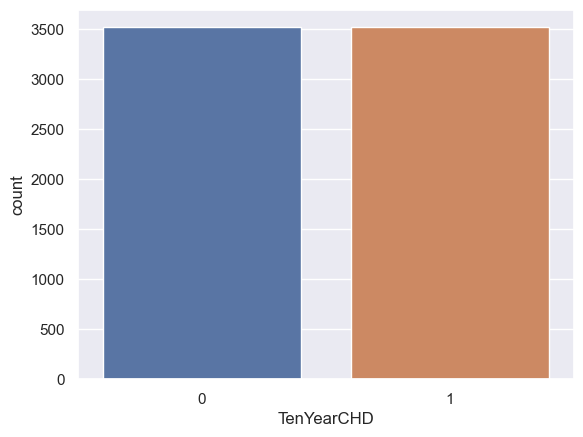

In [111]:
sns.countplot(x=y_os)
plt.show()

In [112]:
df_os=pd.DataFrame(x_os)
df_os['TenYearCHD']=y_os

In [113]:
df_os

male        age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1.000000  39.000000       0.000000    0.000000     0.0              0.0   
1     0.000000  46.000000       0.000000    0.000000     0.0              0.0   
2     1.000000  48.000000       1.000000   20.000000     0.0              0.0   
3     0.000000  61.000000       1.000000   30.000000     0.0              0.0   
4     0.000000  46.000000       1.000000   23.000000     0.0              0.0   
...        ...        ...            ...         ...     ...              ...   
7023  0.666155  65.663085       0.666155    9.992325     0.0              0.0   
7024  0.751130  57.239832       0.751130   15.022595     0.0              0.0   
7025  1.000000  45.306296       1.000000   13.514527     0.0              0.0   
7026  0.837521  47.025127       0.837521   12.562817     0.0              0.0   
7027  0.687958  39.808379       0.312042    6.240841     0.0              0.0   

      prevalentHyp  diabetes     totChol       sysBP       diaBP        BMI  \
0         0.000000       0.0  195.000000  106.000000   70.000000  26.970000   
1         0.000000       0.0  250.000000  121.000000   81.000000  28.730000   
2         0.000000       0.0  245.000000  127.500000   80.000000  25.340000   
3         1.000000       0.0  225.000000  150.000000   95.000000  28.580000   
4         0.000000       0.0  285.000000  130.000000   84.000000  23.100000   
...            ...       ...         ...         ...         ...        ...   
7023      0.333845       0.0  189.661550  146.669225   73.343055  23.770982   
7024      1.000000       0.0  257.506778  236.411881  117.724016  31.894584   
7025      0.589588       0.0  280.052058  149.537531   93.820823  27.096429   
7026      0.000000       0.0  170.000000  128.912901   89.050253  26.586383   
7027      0.000000       0.0  266.312042  112.808379   70.159685  27.044849   

      heartRate     glucose  TenYearCHD  
0     80.000000   77.000000           0  
1     95.000000   76.000000           0  
2     75.000000   70.000000           0  
3     65.000000  103.000000           1  
4     85.000000   85.000000           0  
...         ...         ...         ...  
7023  71.995395   71.332310           1  
7024  70.217238   75.257908           1  
7025  70.566585   63.410412           1  
7026  76.700169   58.299831           1  
7027  78.872252   73.624084           1  

[7028 rows x 15 columns]

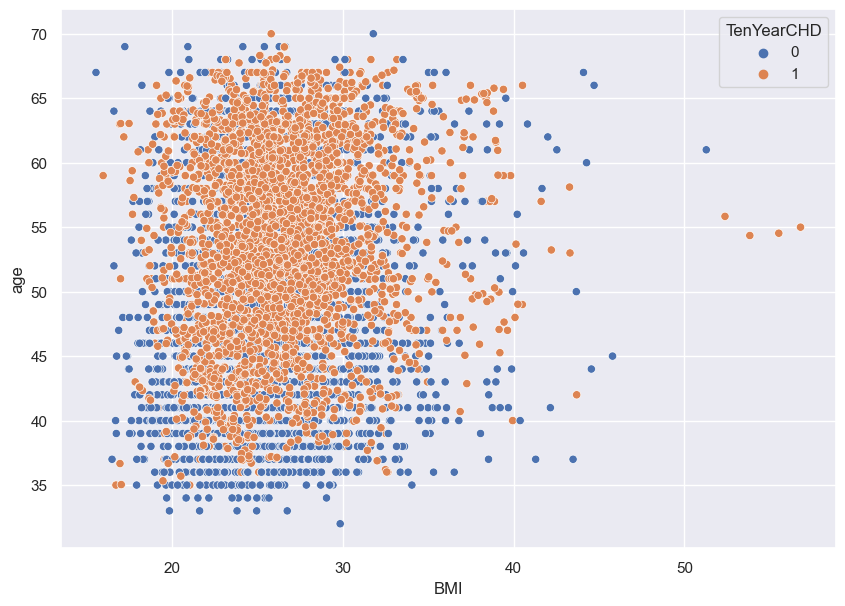

In [114]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_os,x='BMI',y='age',hue='TenYearCHD')
plt.show()


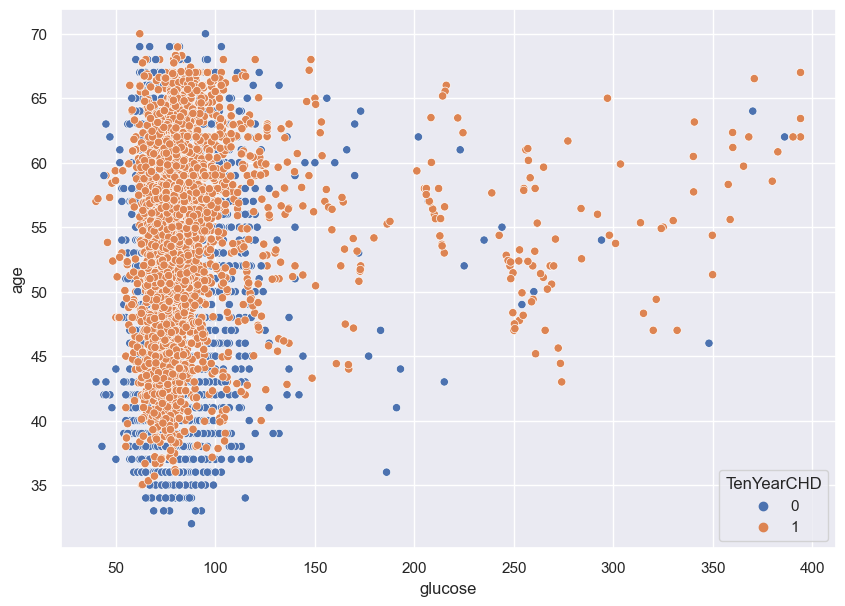

In [115]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_os,x='glucose',y='age',hue='TenYearCHD')
plt.show()


In [119]:
X_train,X_test,y_train,y_test=train_test_split(x_os,y_os,test_size=0.3,random_state=0)

In [120]:
from sklearn.preprocessing import StandardScaler

# Now you can use StandardScaler:
sc_train = StandardScaler().fit(X_train)
X_test_sc = sc_train.transform(X_test)

In [121]:
np.set_printoptions(precision=3)
print(X_test_sc[0:5,:])

[[-1.03   0.048  1.008 -0.068 -0.228 -0.111 -0.81  -0.203 -0.166 -1.587
  -1.419 -1.688  0.092 -0.113  1.012]
 [-1.03  -0.031 -1.058 -0.816 -0.228 -0.111 -0.81  -0.203  0.403 -0.346
  -0.596 -0.285 -0.694  0.142 -0.988]
 [-1.03   0.331 -1.058 -0.816 -0.228 -0.111  1.325 -0.203 -1.011  1.163
   1.513  0.219 -1.72  -0.142 -0.988]
 [-1.03   0.138  0.589 -0.21  -0.228 -0.111 -0.81  -0.203  0.202 -0.983
  -0.742 -0.691 -0.473 -0.425  1.012]
 [-1.03   0.089 -1.058 -0.816 -0.228 -0.111 -0.81  -0.203  0.928 -0.771
  -1.083 -1.087  1.699 -0.781 -0.988]]


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ... (your previous code) ...

# Assuming you have X_train, y_train from train_test_split
sc_train = StandardScaler().fit(X_train)  # Fit scaler on training data
X_train_sc = sc_train.transform(X_train) # Transform training data

# Train the model using scaled training data and training targets
model_lr = LogisticRegression(solver='liblinear')
#model_lr.fit(X_train_sc, y_train)

In [123]:
model_lr.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [124]:
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [125]:
results=model_lr.score(X_test_sc,y_test)
results*100

100.0

In [126]:
results=model_lr.score(X_train_sc,y_train)
results*100

100.0

In [127]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   float64
 1   age              4137 non-null   float64
 2   currentSmoker    4137 non-null   float64
 3   cigsPerDay       4137 non-null   float64
 4   BPMeds           4137 non-null   float64
 5   prevalentStroke  4137 non-null   float64
 6   prevalentHyp     4137 non-null   float64
 7   diabetes         4137 non-null   float64
 8   totChol          4137 non-null   float64
 9   sysBP            4137 non-null   float64
 10  diaBP            4137 non-null   float64
 11  BMI              4137 non-null   float64
 12  heartRate        4137 non-null   float64
 13  glucose          4137 non-null   float64
 14  TenYearCHD       4137 non-null   float64
dtypes: float64(15)
memory usage: 517.1 KB


In [128]:
fhs_cat.columns

Index(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD', 'sex_cat'],
      dtype='object')

In [129]:
fhs_cont['currentSmoker']=df_fhs['currentSmoker']
fhs_cont['diabetes']=df_fhs['diabetes']
fhs_cont['male']=df_fhs['male']


In [130]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4137 non-null   int64  
 1   age              4137 non-null   float64
 2   currentSmoker    4137 non-null   int64  
 3   cigsPerDay       4137 non-null   float64
 4   BPMeds           4137 non-null   float64
 5   prevalentStroke  4137 non-null   float64
 6   prevalentHyp     4137 non-null   float64
 7   diabetes         4137 non-null   int64  
 8   totChol          4137 non-null   float64
 9   sysBP            4137 non-null   float64
 10  diaBP            4137 non-null   float64
 11  BMI              4137 non-null   float64
 12  heartRate        4137 non-null   float64
 13  glucose          4137 non-null   float64
 14  TenYearCHD       4137 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 517.1 KB


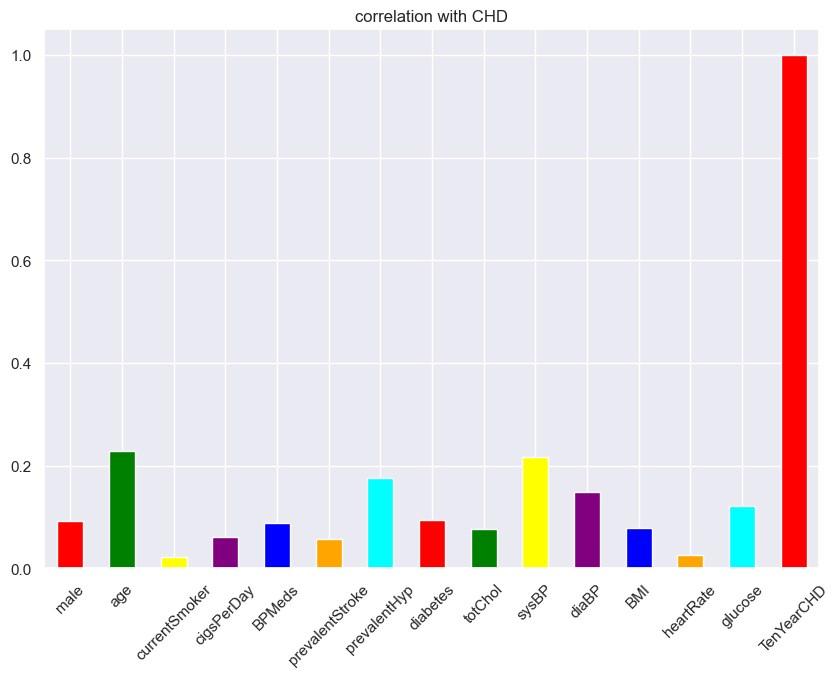

In [131]:
c=['red','green','yellow','purple','blue','orange','cyan']
fhs_cont.corrwith(fhs_cont['TenYearCHD']).plot(kind='bar',figsize=(10,7),title='correlation with CHD',grid=True,rot=45,color=c)
plt.show()

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

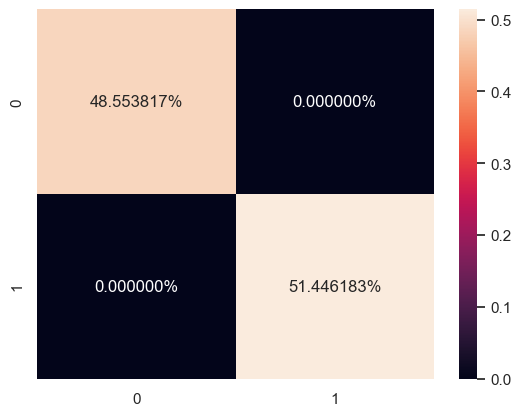

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# ... (Your existing code to load and preprocess data) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=0)

# Scale the data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train_sc, y_train)  # Fit the model to the scaled training data


# Now you can make predictions:
pred_y = model_lr.predict(X_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='2%')
plt.show()

In [134]:
report=classification_report(y_test,pred_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       1.00      1.00      1.00      1085

    accuracy                           1.00      2109
   macro avg       1.00      1.00      1.00      2109
weighted avg       1.00      1.00      1.00      2109



In [135]:
features=list(fhs_cont.columns)
features

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [136]:
coefficients=model_lr.coef_[0]
coefficients

array([ 0.122,  0.264,  0.061,  0.08 ,  0.023,  0.024,  0.074,  0.008,
        0.017,  0.117,  0.011,  0.022, -0.013,  0.074,  6.525])

In [137]:
data_r={
    'features':features,
    'coefficients':coefficients
}
coeff_table=pd.DataFrame(data_r)
coeff_table=coeff_table.sort_values(by='coefficients')
coeff_table

features  coefficients
12        heartRate     -0.012523
7          diabetes      0.008496
10            diaBP      0.010504
8           totChol      0.016781
11              BMI      0.022094
4            BPMeds      0.023251
5   prevalentStroke      0.023709
2     currentSmoker      0.060709
13          glucose      0.073847
6      prevalentHyp      0.074310
3        cigsPerDay      0.080283
9             sysBP      0.116849
0              male      0.122307
1               age      0.264258
14       TenYearCHD      6.524842

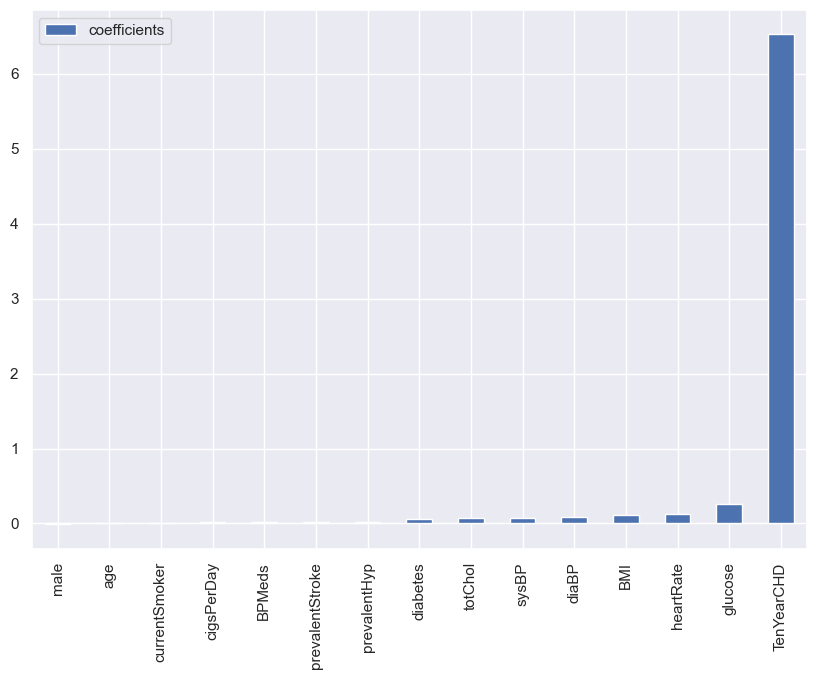

In [138]:
coeff_table.plot(kind='bar',figsize=(10,7))
plt.xticks(np.arange(len(features)),features,rotation=90)
plt.show()

# ML MODEL USING AI


Accuracy: 0.855072463768116
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       704
           1       0.62      0.08      0.14       124

    accuracy                           0.86       828
   macro avg       0.74      0.54      0.53       828
weighted avg       0.82      0.86      0.80       828



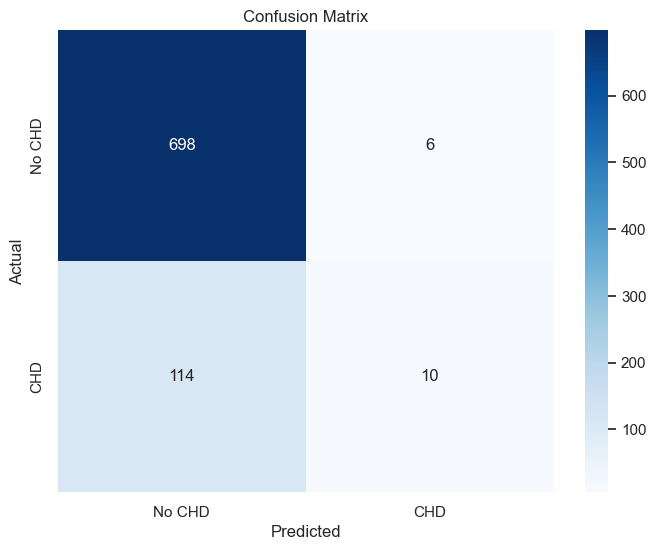

In [140]:
# prompt: create the logistic ml model for my heart diases project accoridng t othis notebook

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_fhs' is your cleaned and preprocessed dataframe
# and 'TenYearCHD' is your target variable.  Adjust accordingly.

# Define features (X) and target (y)
X = df_fhs.drop('TenYearCHD', axis=1)
y = df_fhs['TenYearCHD']

# Convert categorical features to numerical using one-hot encoding if needed
X = pd.get_dummies(X, drop_first=True) # Example, adapt as needed


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
